<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## Explorando Possíveis Correlações entre Saúde e Educação para o Estado de São Paulo

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'César Fukushima Kim, 21004780' #@param {type:"string"}
Aluno2 = 'Enzo Leonardo Sabatelli de Moura, 21015350' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}





# **Resumo (*Abstract*)**

O trabalho procura explorar possíveis relações entre casos de doenças (dengue e gripe) com performance escolar da rede pública, utilizando técnicas de aquisição, tratamento, e manipulação de dados para realizar análises, gerar hipóteses e discutir resultados.

# **Introdução**

O estudo analisado apresenta uma investigação detalhada sobre a possível relação entre indicadores educacionais e epidemiológicos nos 100 municípios mais populosos do estado de São Paulo. A pesquisa foi conduzida para buscar compreender como fatores de saúde pública, especificamente casos de gripe e dengue, podem estar correlacionados com o desempenho escolar medido pelo IDEB.

O trabalho se destaca pela abordagem multidisciplinar, conectando dados educacionais do INEP com informações epidemiológicas da Fiocruz e da InfoDengue, através da biblioteca PySUS. Esta integração de diferentes fontes de dados permite uma análise mais abrangente e contextualizada dos fenômenos estudados, possibilitando insights sobre como questões de saúde pública podem impactar o ambiente educacional.

A estrutura do relatório segue uma metodologia clara de análise exploratória de dados (EDA), partindo da aquisição e preparação dos dados, passando pelo tratamento e transformação das informações, até chegar às análises específicas guiadas por perguntas de pesquisa bem definidas. Esta abordagem sistemática permite uma compreensão gradual e aprofundada das relações investigadas.

# **Descrição e origem dos dados**

Primariamente, serão utilizados os dados de resultados do Índice de Desenvolvimento da Educação Básica (IDEB), os dados de gripe fornecidos pela InfoGripe da Fiocruz e dados dos casos de dengue da InfoDengue.

Os resultados do IDEB também apresentam as taxas de aprovação, as notas do Sistema de Avaliação da Educação Básica (SAEB), as médias do IDEB e as médias estimadas para os próximos anos.

O dataset sobre os dados da gripe englobam vários tipos de vírus, com um foco mais epidemiológico, listando as diferentes idades e sexo, o número de testes e os casos que ainda não possuem resultados. Os dados são separados por estados.

Os casos da dengue são por município, e apresentam dados como temperatura e umidade da cidade e o número de caso.







In [ ]:
#@title ##Instalacao do PySUS e bibliotecas
!apt install libffi-dev
!pip install PySUS pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca PySUS
from pysus.online_data.Infogripe import list_datasets, download

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libffi-dev is already the newest version (3.4.2-4).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## Indicadores de desempenho escolar (Aprovação, SAEB, IDEB)

Dados sobre performance escolar por municípios, adquiridos pelo site do INEP

`df_municipios_anos_iniciais` → 1º ao 5º ano escolar de 2005 a 2023

`df_municipios_anos_finais_` → 6º ao 9º ano escolar de 2005 a 2023

`df_municipios_ensino_medio_` → 1ª a 4ª série de 2017 a 2023

In [ ]:
#Carregando os dados de performance escolar

# Dados de performance escolar
df_municipios_anos_iniciais = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/indicadores-desempenho-escolar/divulgacao_anos_iniciais_municipios_2023.csv',
                                             delimiter=';')
df_municipios_anos_finais = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/indicadores-desempenho-escolar/divulgacao_anos_finais_municipios_2023.csv',
                                           delimiter=';')
df_municipios_ensino_medio = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/indicadores-desempenho-escolar/divulgacao_ensino_medio_municipios_2023.csv',
                                            delimiter=';')

---
## Definindo os municípios estudados
A pesquisa irá utilizar as 100 cidades mais populosas do estado de São Paulo. O arquivo `cidades_mais_populosas_sp_100.csv` foi feito por nós a fim de facilitar consultas.

In [ ]:
# Dataset de cidades utilizadas na analise
df_municipios_sao_paulo = pd.read_csv('https://raw.githubusercontent.com/cesarfkb/trabalho-CD-semestral/refs/heads/main/bancos/cidades/cidades_mais_populosas_sp_100.csv')

---
## Dados do Infogripe

A api do PySUS será utilizada para coletar os dados da Fiocruz sobre gripes por estado.

In [ ]:
#@title ##Listando os datasets disponiveis do infogripe
list_datasets()

['Alerta de situação',
 'Casos por idade, sexo e virus',
 'Casos Totais e estimativas',
 'Valores esperados por localidades']

In [ ]:
#@title ### Coletando dados do infogripe

# Erro na chamada do banco de dados do PySUS
# df_totals = download("Casos Totais e estimativas")
# df_totals

# Criacao de nova funcao de download
BASEURL = r"https://gitlab.fiocruz.br/marcelo.gomes/infogripe/-/raw/master/Dados/InfoGripe/"  # noqa
DATASETS = {
  "Alerta de situação": r"tabela_de_alerta.csv",
  "Casos por idade, sexo e virus": r"dados_semanais_faixa_etaria_sexo_virus.csv.gz",  # noqa
  "Casos Totais e estimativas": r"serie_temporal_com_estimativas_recentes.csv.gz",  # noqa
  "Valores esperados por localidades": "valores_esperados_por_localidade.csv",  # noqa
}

def download(dataset_name):
  if DATASETS[dataset_name].endswith('z'):
    url = BASEURL + DATASETS[dataset_name] + "?inline=false"
    df = pd.read_csv(url, delimiter=";", decimal=",", compression='gzip')
  else:
    url = BASEURL + DATASETS[dataset_name] + "?inline=false"
    df = pd.read_csv(url, delimiter=";", decimal=",")
  return df

df_gripe_idade = download("Casos por idade, sexo e virus")
df_casos_totais = download('Casos Totais e estimativas')

---
## Dados do Infodengue
Também será utilizada a api do PySUS para coletar os dados do InfoDengue sobre casos de dengue por município.

In [ ]:
#@title ### Coletando dados do infodengue
from pysus.online_data.Infodengue import search_string, download

# Lista de nome das cidades que serão utilizadas na análise
nome_cidades = df_municipios_sao_paulo['Cidade'].unique().tolist()


Como os dados do InfoDengue são armazenados por município, será criado um dicionário de DataFrames, contendo informações sobre cada um dos 100 municípios.

In [ ]:
# Criando dataframes para cada cidade de SP
from itertools import product

df_cidades_dengue = {}

for cidade in nome_cidades:
  df = download('dengue', 201101, 202352, cidade)
  df_cidades_dengue[cidade] = df

# **Aquisição e Preparação dos dados**

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis).








# Tratamento dos dados de performance escolar

## Alterando a tabela para encaixar na janela de tempo 2011-2023

Para os anos inciais e finais, os dados se encontram de 2005 até 2023, então será feito um recorte apenas do período desejado. Além disso, será o uso de vírgula para denotar decimal será alterado para ponto e definiremos o data type dos valores.

In [ ]:
# @title ##Recorte de período dos dados de performance escolar a partir de 2011

# Ajustando os dados de performance escolar
colunas_copiadas = df_municipios_anos_iniciais.columns[:4]
# Copiando as 4 primeiras colunas
df_municipios_anos_iniciais_tratado = df_municipios_anos_iniciais[colunas_copiadas].copy()

# Anos que serão trabalhados
years = ['2011', '2013', '2015', '2017', '2019', '2021', '2023']

for col in df_municipios_anos_iniciais.columns[4:]:
  if any(year in col for year in years):

    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais[col].copy()

    # Definindo valores NaN para dados não coletados
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].str.replace('*', '')
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].replace(['-', 'ND'], np.nan)

    # Trocando formato de número para ponto
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].str.replace(',', '.')

    # Trocando dtype de object para float
    df_municipios_anos_iniciais_tratado[col] = df_municipios_anos_iniciais_tratado[col].astype(float)

Para os dados do ensino médio, não é necessário o recorte de período, já que os dados mais antigos são de 2017.

In [ ]:
#@title ##Realizando o mesmo processo para as tabelas restantes

# Ensino fundamental - Anos finais
colunas_copiadas = df_municipios_anos_finais.columns[:4]
df_municipios_anos_finais_tratado = df_municipios_anos_finais[colunas_copiadas].copy()

for col in df_municipios_anos_finais.columns[4:]:
  if any(year in col for year in years):
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais[col].copy()
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].str.replace('*', '')
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].replace(['-', 'ND'], np.nan)
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].str.replace(',', '.')
    df_municipios_anos_finais_tratado[col] = df_municipios_anos_finais_tratado[col].astype(float)

# Ensino médio
colunas_copiadas = df_municipios_ensino_medio.columns[:4]
df_municipios_ensino_medio_tratado = df_municipios_ensino_medio[colunas_copiadas].copy()

for col in df_municipios_ensino_medio.columns[4:]:
  df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio[col].copy()
  df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].str.replace('*', '')
  df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].replace(['-', 'ND'], np.nan)
  df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].str.replace(',', '.')
  df_municipios_ensino_medio_tratado[col] = df_municipios_ensino_medio_tratado[col].astype(float)

## Alterando os dados para apenas São Paulo, nos municípios que estão nos dados do PySUS

Com o período de tempo já definido, precisamos filtrar os datasets de indicadores de desempenho escolar, para utilizar somente os municípios que serão analisados.

In [ ]:
# Utilizando os códigos de municipio do IBGE
codigos_cidades = df_municipios_anos_iniciais[df_municipios_anos_iniciais['NO_MUNICIPIO'].isin(nome_cidades)]['CO_MUNICIPIO'].unique()

# Filtrando apenas os dados de São Paulo
df_municipios_anos_iniciais_tratado = df_municipios_anos_iniciais_tratado[df_municipios_anos_iniciais_tratado['CO_MUNICIPIO'].isin(codigos_cidades)]

# Verificando resultado
df_municipios_anos_iniciais_tratado.NO_MUNICIPIO.unique()

array(['São Vicente', 'Santo André', 'Rio Claro', 'Americana',
       'Araçatuba', 'Araraquara', 'Araras', 'Arujá', 'Assis', 'Atibaia',
       'Avaré', 'Bariri', 'Barretos', 'Barueri', 'Bauru', 'Birigui',
       'Botucatu', 'Bragança Paulista', 'Caieiras', 'Campinas',
       'Campo Limpo Paulista', 'Capão Bonito', 'Carapicuíba', 'Catanduva',
       'Cotia', 'Cravinhos', 'Cubatão', 'Diadema', 'Dracena',
       'Embu das Artes', 'Embu-Guaçu', 'Ferraz de Vasconcelos', 'Franca',
       'Francisco Morato', 'Franco da Rocha', 'Guarujá', 'Guarulhos',
       'Hortolândia', 'Ibitinga', 'Ibiúna', 'Indaiatuba', 'Itanhaém',
       'Itapecerica da Serra', 'Itapetininga', 'Itapevi', 'Itapira',
       'Itaquaquecetuba', 'Itu', 'Ituverava', 'Jaboticabal', 'Jacareí',
       'Jandira', 'Jaú', 'Jundiaí', 'Lençóis Paulista', 'Limeira', 'Lins',
       'Lorena', 'Mairiporã', 'Marília', 'Matão', 'Mauá', 'Mirassol',
       'Mogi das Cruzes', 'Mogi Guaçu', 'Monte Mor', 'Osasco', 'Ourinhos',
       'Paulínia', 

O mesmo processo será realizado para os datasets de anos finais e ensino médio.

In [ ]:
# Filtrando ensino fundamental (anos finais)
df_municipios_anos_finais_tratado = df_municipios_anos_finais_tratado[df_municipios_anos_finais_tratado['CO_MUNICIPIO'].isin(codigos_cidades)]

# Filtrando ensino médio
df_municipios_ensino_medio_tratado = df_municipios_ensino_medio_tratado[df_municipios_ensino_medio_tratado['CO_MUNICIPIO'].isin(codigos_cidades)]

---
## Filtrando datasets do infogripe

Os dados do Infogripe devem ser filtrados para o período estudado e para apenas conter as informações do estado de São Paulo.

In [ ]:
# Reduzindo o dataset de gripe para apenas São Paulo e no período de 2011-2023
df_gripe_idade_tratado = df_gripe_idade[df_gripe_idade['Unidade da Federação'] == 'São Paulo']
df_gripe_idade_tratado = df_gripe_idade_tratado[df_gripe_idade['Ano epidemiológico'].isin([2011, 2013, 2015, 2017,2019,2021,2023])].copy()

<ipython-input-98-cb75e7dcf7a9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gripe_idade_tratado = df_gripe_idade_tratado[df_gripe_idade['Ano epidemiológico'].isin([2011, 2013, 2015, 2017,2019,2021,2023])].copy()


---
## Transpondo dados do InfoDengue
Os datasets de dengue possuem headers para colunas e para linhas. As colunas são as datas no formato ano e semana (YYYYWW). Os dataframes serão transpostos para fazer uso da linha `data_iniSE` e auxiliar nas analises.

In [ ]:
df_cidades_dengue[nome_cidades[0]].head()

SE,202352,202351,202350,202349,202348,202347,202346,202345,202344,202343,...,201110,201109,201108,201107,201106,201105,201104,201103,201102,201101
data_iniSE,2023-12-24,2023-12-17,2023-12-10,2023-12-03,2023-11-26,2023-11-19,2023-11-12,2023-11-05,2023-10-29,2023-10-22,...,2011-03-06,2011-02-27,2011-02-20,2011-02-13,2011-02-06,2011-01-30,2011-01-23,2011-01-16,2011-01-09,2011-01-02
casos_est,942.0,815.0,938.0,931.0,920.0,790.0,700.0,747.0,633.0,754.0,...,439.0,482.0,417.0,349.0,338.0,392.0,349.0,303.0,329.0,245.0
casos_est_min,942,815,938,931,920,790,700,747,633,754,...,439,482,417,349,338,392,349,303,329,245
casos_est_max,942.0,815.0,938.0,931.0,920.0,790.0,700.0,747.0,633.0,754.0,...,439.0,482.0,417.0,349.0,338.0,392.0,349.0,303.0,329.0,245.0
casos,942,815,938,931,920,790,700,747,633,754,...,439,482,417,349,338,392,349,303,329,245


In [ ]:
#@title ##Transpondo dados de dengue

df_cidades_dengue_transposto = {}

for cidade in nome_cidades:
  df_cidades_dengue_transposto[cidade] = df_cidades_dengue[cidade].T
  df_cidades_dengue_transposto[cidade]['NO_MUNICIPIO'] = cidade

In [ ]:
#@title ##Criando dataframe de dengue concatenado

df_cidades_dengue_concat = pd.concat(df_cidades_dengue_transposto.values(), ignore_index=True)
df_cidades_dengue_concat

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,NO_MUNICIPIO
0,2023-12-24,942.0,942,942.0,942,0.831086,7.721198,0,2,355030820235220088,...,55.729129,23.407086,28.094371,407.0,NaN,NaN,NaN,NaN,426894,São Paulo
1,2023-12-17,815.0,815,815.0,815,0.010364,6.680229,0,2,355030820235120081,...,57.273843,22.8381,27.446057,319.0,NaN,NaN,NaN,NaN,426894,São Paulo
2,2023-12-10,938.0,938,938.0,938,0.929131,7.688411,0,3,355030820235020074,...,59.753514,21.8778,26.700071,266.0,NaN,NaN,NaN,NaN,426894,São Paulo
3,2023-12-03,931.0,931,931.0,931,0.999117,7.631035,0,3,355030820234920067,...,64.545743,23.159443,27.103014,191.0,NaN,NaN,NaN,NaN,426894,São Paulo
4,2023-11-26,920.0,920,920.0,920,0.999996,7.540873,0,3,355030820234820060,...,66.6887,21.963557,26.329243,157.0,NaN,NaN,NaN,NaN,426894,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67795,2011-01-30,11.0,11,11,11,0.77846,14.165765,0,2,352430320110519589,...,48.714286,26.928571,34.0,4.0,NaN,NaN,NaN,NaN,12594,Jaboticabal
67796,2011-01-23,9.0,9,9,9,0.653969,11.590172,0,2,352430320110419589,...,44.285714,28.583333,35.0,1.0,NaN,NaN,NaN,NaN,12594,Jaboticabal
67797,2011-01-16,9.0,9,9,9,0.222556,11.590172,0,2,352430320110319589,...,56.428571,26.791667,33.142857,1.0,NaN,NaN,NaN,NaN,12594,Jaboticabal
67798,2011-01-09,4.0,4,4,4,0.001042,5.151187,0,2,352430320110219589,...,66.285714,25.767857,30.571429,1.0,NaN,NaN,NaN,NaN,12594,Jaboticabal


# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## **Q1. Pergunta 1.** Como evoluíram os casos de gripe e dengue em São Paulo entre 2011 e 2023? E como o IDEB se comporta ao longo desses anos?

Esta análise inicial propõe visualizar o comportamento dos casos de dengue, dos casos de gripe e dos resultados do IDEB ao longo de 2011 a 2023.

A primeira exploração é generalizada, e tem como objetivo apontar alguns fatores que possam ser estudados, e tentar formular algumas hipóteses que expliquem o comportamento dos dados.

### Preparando os dados para visualização
Nesta etapa vamos separar os dataframes por ano e estado para começar a exploração.

In [ ]:
# Evolução dos casos de gripe em SP (2017-2023)
df_gripe_ano = df_gripe_idade[df_gripe_idade['Unidade da Federação'] == "São Paulo"].groupby('Ano epidemiológico')['Casos semanais reportados até a última atualização'].sum().reset_index()

# cortar dados antes de 2011 e depois de 2023
df_gripe_ano = df_gripe_ano[(df_gripe_ano['Ano epidemiológico'] >= 2011) & (df_gripe_ano['Ano epidemiológico'] <= 2023)]

# agrupar casos de dengue em SP por ano
df_dengue_ano = df_cidades_dengue_concat.groupby('data_iniSE')['casos_est'].sum().reset_index()
df_dengue_ano['Ano'] = pd.to_datetime(df_dengue_ano['data_iniSE']).dt.year
df_dengue_ano = df_dengue_ano.groupby('Ano')['casos_est'].sum().reset_index()

In [ ]:
# Calcular IDEB médio estadual por ano
ideb_cols_ano = [f'VL_OBSERVADO_{y}' for y in ['2011', '2013', '2015', '2017', '2019', '2021', '2023'] if f'VL_OBSERVADO_{y}' in df_municipios_anos_iniciais_tratado.columns]
df_ideb_ano = pd.DataFrame({
    'Ano': [int(col[-4:]) for col in ideb_cols_ano],
    'IDEB_medio': [df_municipios_anos_iniciais_tratado[col].mean() for col in ideb_cols_ano]
})

# Casos de gripe por ano
df_gripe_ano = df_gripe_idade_tratado.groupby('Ano epidemiológico')['Casos semanais reportados até a última atualização'].sum().reset_index()
df_gripe_ano.rename(columns={'Ano epidemiológico': 'Ano', 'Casos semanais reportados até a última atualização': 'Casos_Gripe'}, inplace=True)

# Merge para comparar as séries
df_ideb_gripe = pd.merge(df_ideb_ano, df_gripe_ano, on='Ano')

### Plotando as séries

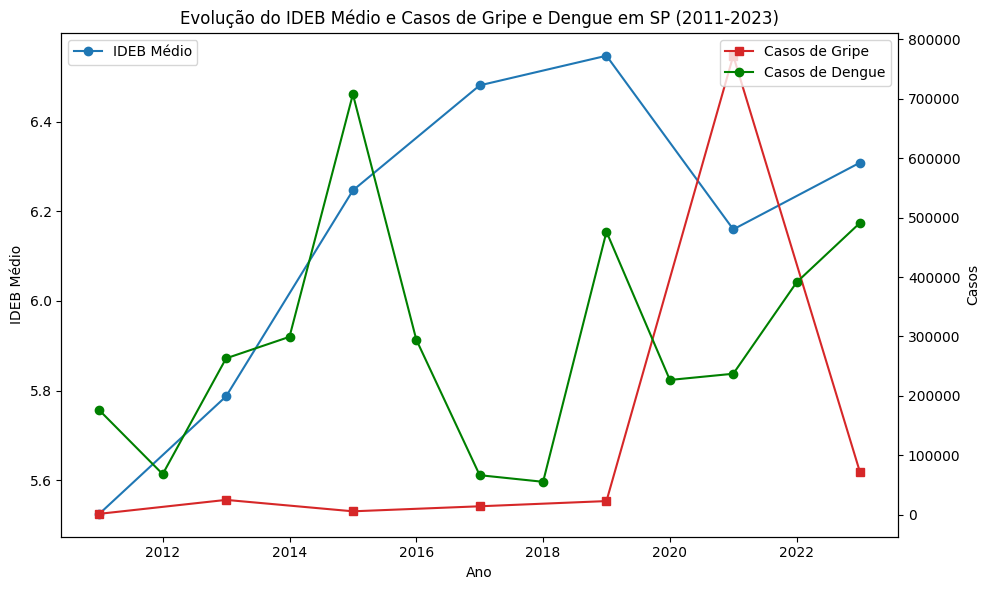

In [ ]:
# Plotar as duas séries temporais
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('IDEB Médio')
ax1.plot(df_ideb_gripe['Ano'], df_ideb_gripe['IDEB_medio'], marker='o', color=color, label='IDEB Médio')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Casos')
ax2.plot(df_ideb_gripe['Ano'], df_ideb_gripe['Casos_Gripe'], marker='s', color=color, label='Casos de Gripe')
ax2.tick_params(axis='y')

# adicionar dengue
df_dengue_ano_plot = df_dengue_ano.copy()
df_dengue_ano_plot = df_cidades_dengue_concat.groupby('data_iniSE')['casos_est'].sum().reset_index()
df_dengue_ano_plot['Ano'] = pd.to_datetime(df_dengue_ano_plot['data_iniSE']).dt.year
df_dengue_ano_plot = df_dengue_ano_plot.groupby('Ano')['casos_est'].sum().reset_index()
ax2.plot(df_dengue_ano_plot['Ano'], df_dengue_ano_plot['casos_est'], marker='o', color='green', label='Casos de Dengue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Evolução do IDEB Médio e Casos de Gripe e Dengue em SP (2011-2023)')
fig.tight_layout()
plt.show()

No gráfico existem alguns pontos de interesse. Há uma tendência de aumento do IDEB e dos casos de dengue nos primeiros anos. O comportamento da dengue é mais explosivo, existindo um salto entre 2014 e 2015 e uma queda em sequência em 2016, enquanto o IDEB continua com seu aumento. Este comportamento talves já indique uma falta de correlação entre doenças (dengue) com educação.

O segundo ponto de interesse se encontra em 2021, onde há um pico nos casos de gripe e uma queda no IDEB médio e nos casos de dengue. Os dados da Fiocruz incluem diagnósticos de covid-19, podendo ser esse o culpado, e não necessariamente uma correlação.

## **Q2. Pergunta 2.** Existe relação entre o desempenho escolar (IDEB) e a incidência de dengue nos municípios de São Paulo?

Aprofundando a análise, vamos verificar se existe uma relação entre IDEB e incidência de dengue, para de fato descobrirmos o valor dessa correlação.

In [ ]:
# Calcular IDEB médio por município (anos iniciais)
ideb_cols = [f'VL_OBSERVADO_{y}' for y in ['2011', '2013', '2015', '2017', '2019', '2021', '2023'] if f'VL_OBSERVADO_{y}' in df_municipios_anos_iniciais_tratado.columns]
df_municipios_anos_iniciais_tratado['IDEB_medio'] = df_municipios_anos_iniciais_tratado[ideb_cols].mean(axis=1)
# agrupar por município e calcular a média do IDEB
df_ideb_municipios = df_municipios_anos_iniciais_tratado.groupby(['NO_MUNICIPIO', 'CO_MUNICIPIO'])['IDEB_medio'].mean().reset_index()
df_ideb_municipios

,NO_MUNICIPIO,CO_MUNICIPIO,IDEB_medio
0,Americana,3501608,6.595238
1,Araraquara,3503208,6.295238
2,Araras,3503307,6.609524
3,Araçatuba,3502804,6.457143
4,Arujá,3503901,5.842857
...,...,...,...
100,Valinhos,3556206,6.214286
101,Vargem Grande Paulista,3556453,6.014286
102,Votorantim,3557006,6.328571
103,Votuporanga,3557105,6.585714


### Verificando número de casos

A fim de fazer uma comparação e rápida verificação, serão feitos dois barplots para mostrar os casos de dengue por município. Um a cada 100.000 habitantes e outro em total de casos.

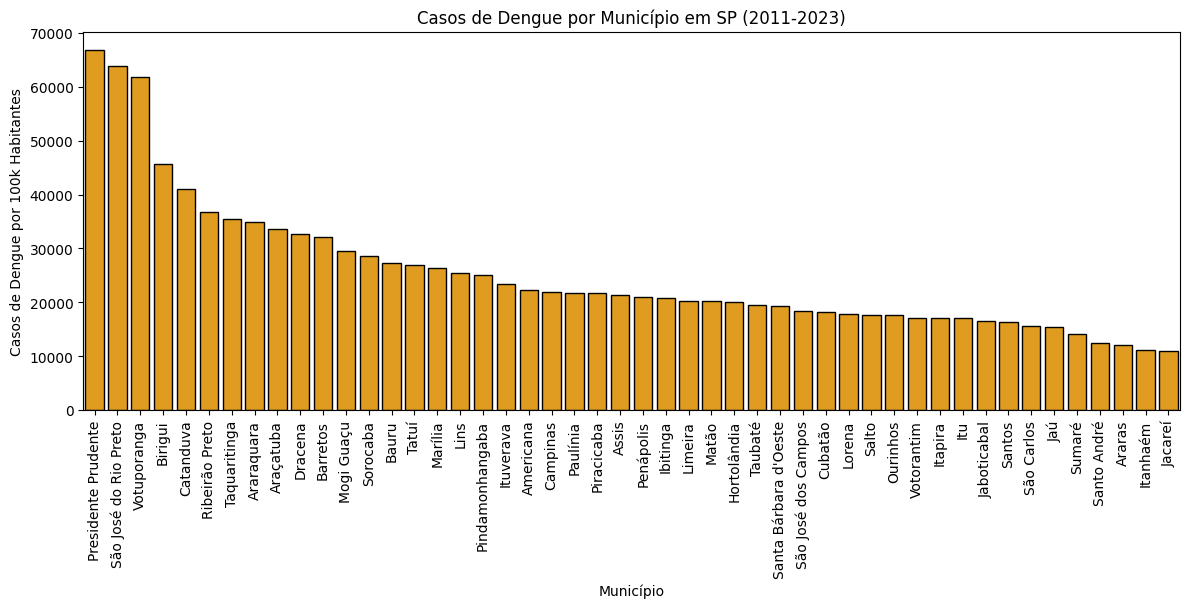

In [ ]:
# 2. Calcular casos de dengue por município
df_dengue_municipios = df_cidades_dengue_concat.groupby('NO_MUNICIPIO')['p_inc100k'].sum().reset_index()

# merge com o dataframe de IDEB
df_merged = pd.merge(df_ideb_municipios, df_dengue_municipios, on='NO_MUNICIPIO', how='inner')

# Converter p_inc100k para float (caso ainda não esteja)
df_merged['p_inc100k'] = pd.to_numeric(df_merged['p_inc100k'], errors='coerce')

# plotar grafico de barras com casos de dengue por município ordenando por numero de casos/100k hab, apenas com os 50 primeiros municípios
df_merged_50 = df_merged.sort_values(by='p_inc100k', ascending=False).head(50)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_merged_50, x='NO_MUNICIPIO', y='p_inc100k', color='orange', edgecolor='black')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Município')
plt.ylabel('Casos de Dengue por 100k Habitantes')
plt.title('Casos de Dengue por Município em SP (2011-2023)')
plt.show()

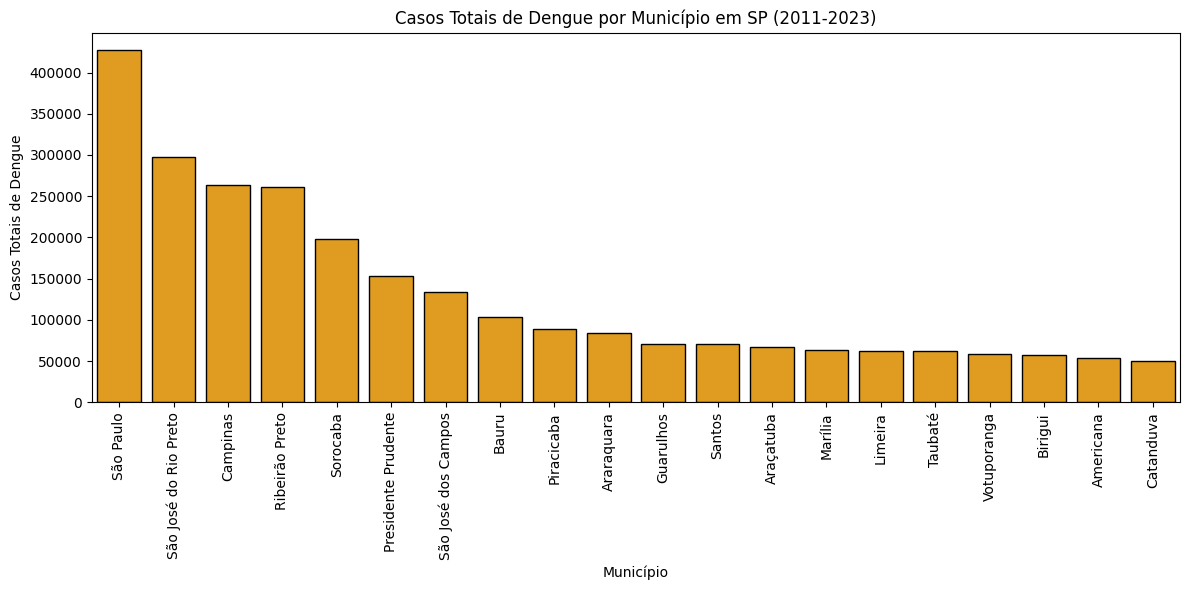

In [ ]:
# plotar grafico em barras de casos totais de dengue por municipio
df_dengue_municipios = df_cidades_dengue_concat.groupby('NO_MUNICIPIO')['casos_est'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_dengue_municipios.sort_values('casos_est', ascending=False).head(20), x='NO_MUNICIPIO', y='casos_est', color='orange', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Casos Totais de Dengue por Município em SP (2011-2023)')
plt.xlabel('Município')
plt.ylabel('Casos Totais de Dengue')
plt.tight_layout()
plt.show()

### Encontrando a correlação
Para encontrar a correlação, será feita uma análise de um scatterplot e depois um cálculo de correlação.

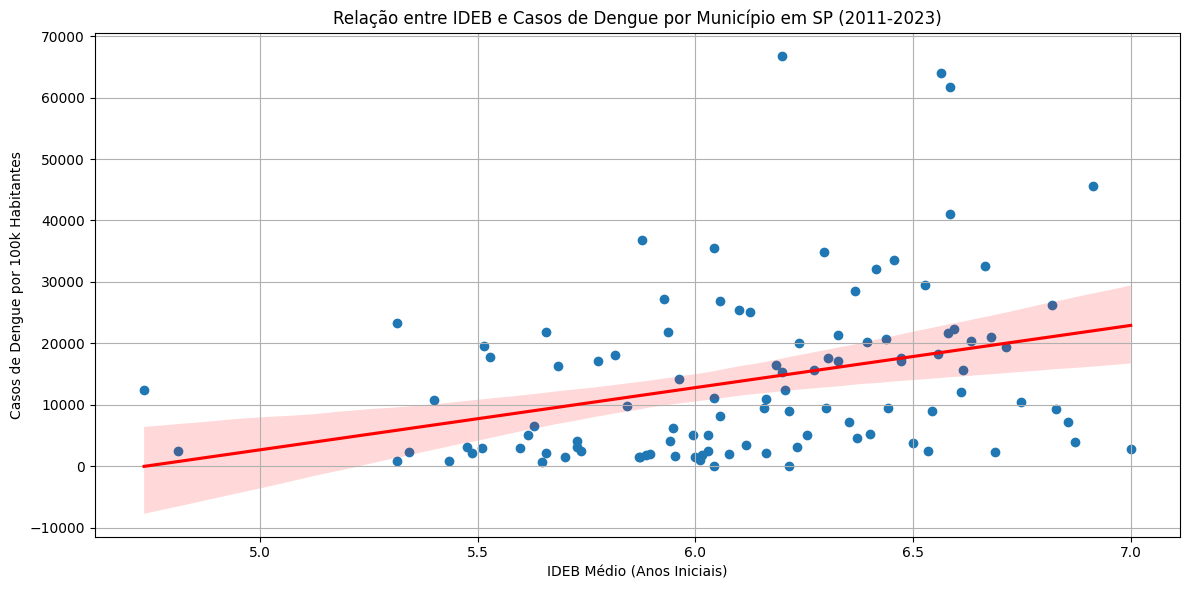

In [ ]:
# plotar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.regplot(data=df_merged, x='IDEB_medio', y='p_inc100k', scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.title('Relação entre IDEB e Casos de Dengue por Município em SP (2011-2023)')
plt.xlabel('IDEB Médio (Anos Iniciais)')
plt.ylabel('Casos de Dengue por 100k Habitantes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# calcular a correlação entre IDEB e casos de dengue/100k habitantes
correlacao = df_merged['IDEB_medio'].corr(df_merged['p_inc100k'])
print(f"Correlação entre IDEB e Casos de Dengue: {correlacao:.2f}")

Correlação entre IDEB e Casos de Dengue: 0.33


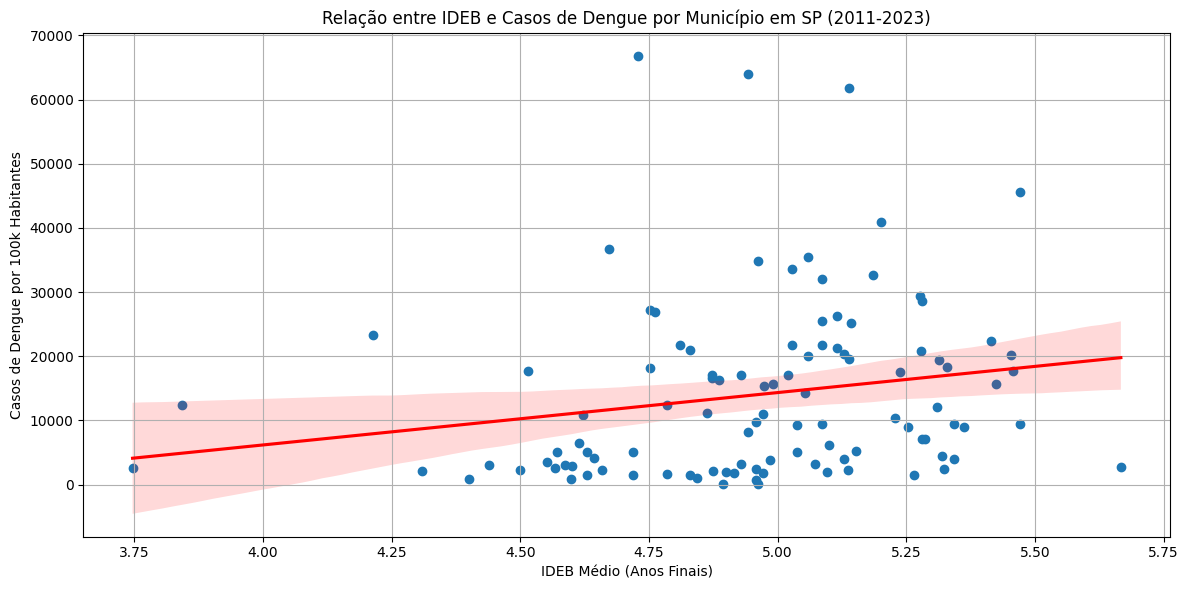

In [ ]:
# Calcular IDEB médio por município (anos finais)
ideb_cols = [f'VL_OBSERVADO_{y}' for y in ['2011', '2013', '2015', '2017', '2019', '2021', '2023'] if f'VL_OBSERVADO_{y}' in df_municipios_anos_iniciais_tratado.columns]
df_municipios_anos_finais_tratado['IDEB_medio'] = df_municipios_anos_finais_tratado[ideb_cols].mean(axis=1)
# agrupar por município e calcular a média do IDEB
df_ideb_municipios = df_municipios_anos_finais_tratado.groupby(['NO_MUNICIPIO', 'CO_MUNICIPIO'])['IDEB_medio'].mean().reset_index()

# 2. Calcular casos de dengue por município
df_dengue_municipios = df_cidades_dengue_concat.groupby('NO_MUNICIPIO')['p_inc100k'].sum().reset_index()

# merge com o dataframe de IDEB
df_merged_finais = pd.merge(df_ideb_municipios, df_dengue_municipios, on='NO_MUNICIPIO', how='inner')

# Converter p_inc100k para float (caso ainda não esteja)
df_merged_finais['p_inc100k'] = pd.to_numeric(df_merged_finais['p_inc100k'], errors='coerce')

# plotar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.regplot(data=df_merged_finais, x='IDEB_medio', y='p_inc100k', scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.title('Relação entre IDEB e Casos de Dengue por Município em SP (2011-2023)')
plt.xlabel('IDEB Médio (Anos Finais)')
plt.ylabel('Casos de Dengue por 100k Habitantes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# calcular a correlação entre IDEB e casos de dengue/100k habitantes
correlacao = df_merged_finais['IDEB_medio'].corr(df_merged_finais['p_inc100k'])
print(f"Correlação entre IDEB e Casos de Dengue: {correlacao:.2f}")

Correlação entre IDEB e Casos de Dengue: 0.20


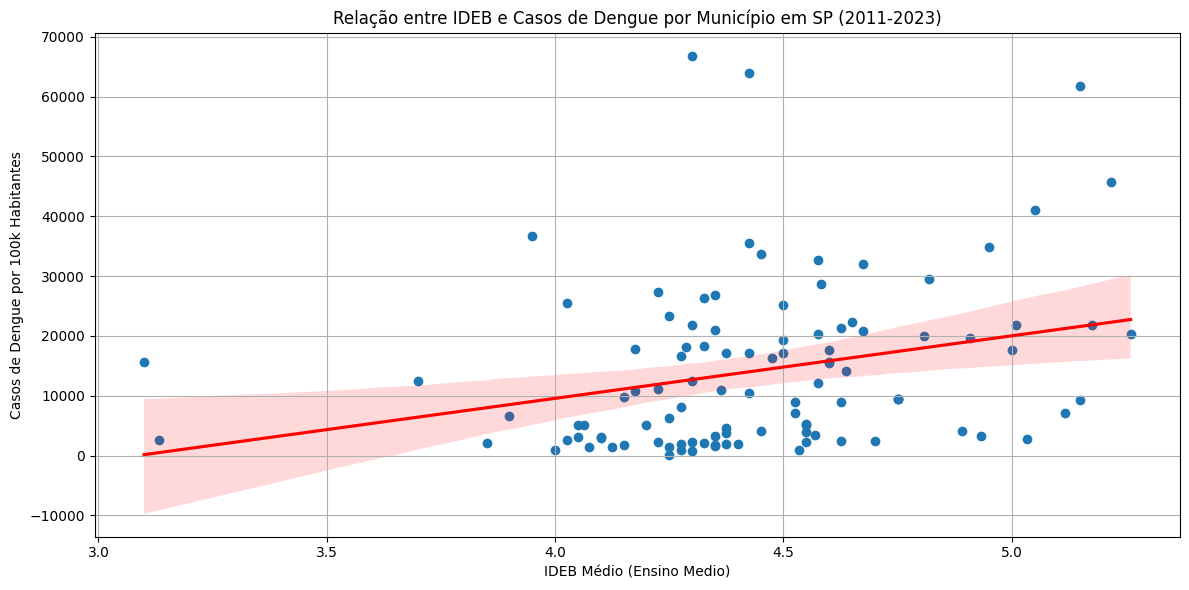

In [ ]:
# Calcular IDEB médio por município (ensino medio)
ideb_cols = [f'VL_OBSERVADO_{y}' for y in ['2017', '2019', '2021', '2023'] if f'VL_OBSERVADO_{y}' in df_municipios_anos_iniciais_tratado.columns]
df_municipios_ensino_medio_tratado['IDEB_medio'] = df_municipios_ensino_medio_tratado[ideb_cols].mean(axis=1)
# agrupar por município e calcular a média do IDEB
df_ideb_municipios = df_municipios_ensino_medio_tratado.groupby(['NO_MUNICIPIO', 'CO_MUNICIPIO'])['IDEB_medio'].mean().reset_index()

# 2. Calcular casos de dengue por município
df_dengue_municipios = df_cidades_dengue_concat.groupby('NO_MUNICIPIO')['p_inc100k'].sum().reset_index()

# merge com o dataframe de IDEB
df_merged_medio = pd.merge(df_ideb_municipios, df_dengue_municipios, on='NO_MUNICIPIO', how='inner')

# Converter p_inc100k para float (caso ainda não esteja)
df_merged_medio['p_inc100k'] = pd.to_numeric(df_merged_medio['p_inc100k'], errors='coerce')

# plotar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.regplot(data=df_merged_medio, x='IDEB_medio', y='p_inc100k', scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.title('Relação entre IDEB e Casos de Dengue por Município em SP (2011-2023)')
plt.xlabel('IDEB Médio (Ensino Medio)')
plt.ylabel('Casos de Dengue por 100k Habitantes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# calcular a correlação entre IDEB e casos de dengue/100k habitantes
correlacao = df_merged_medio['IDEB_medio'].corr(df_merged_medio['p_inc100k'])
print(f"Correlação entre IDEB e Casos de Dengue: {correlacao:.2f}")

Correlação entre IDEB e Casos de Dengue: 0.28


A correlação encontrada é de 0.33. Uma fraca correlação positiva.

A dengue, porém, possui maior incidéncia em municípios mais urbanos. Há alguns casos de alto IDEB com altos casos, o que indicia uma possível correlação entre população e educação, possível por meio do maior desenvolvimento dos centros urbanos.

Fiocruz. Conheça o comportamento do mosquito Aedes aegypti e entenda a razão que leva este pequeno inseto a ser taxado desta forma. Fiocruz, Dengue. Disponível em: [https://www.ioc.fiocruz.br/dengue/textos/oportunista.html#:~:text=Por%20ser%20um%20mosquito%20que,de%20mais%20criadouros%20para%20desovar]. Acesso em: 03 jun. 2025

## **Q3. Pergunta 3.** Há diferença significativa no IDEB entre municípios com alta e baixa incidência de dengue?

No âmbito geral, há uma baixa correlação linear. Torna-se interessante então, verificar os municípios e seus diferentes índices de casos.

### Tratamento de dados
Aqui vamos criar os dataframes com o valor médio e de desvio padrão.

In [ ]:
# Calcular o desvio padrão do IDEB por município (anos iniciais)
ideb_cols = [f'VL_OBSERVADO_{y}' for y in ['2011', '2013', '2015', '2017', '2019', '2021', '2023'] if f'VL_OBSERVADO_{y}' in df_municipios_anos_iniciais_tratado.columns]
df_municipios_anos_iniciais_tratado['IDEB_std'] = df_municipios_anos_iniciais_tratado[ideb_cols].std(axis=1)

# Calcular IDEB médio por município
df_municipios_anos_iniciais_tratado['IDEB_medio'] = df_municipios_anos_iniciais_tratado[ideb_cols].mean(axis=1)

# Casos de dengue por município
df_dengue_municipios = df_cidades_dengue_concat.groupby('NO_MUNICIPIO')['p_inc100k'].sum().reset_index()

# Merge
df_var_ideb = pd.merge(
    df_municipios_anos_iniciais_tratado[['NO_MUNICIPIO', 'IDEB_std', 'IDEB_medio']],
    df_dengue_municipios,
    on='NO_MUNICIPIO',
    how='inner'
)

# Top 10 municípios com maior variação no IDEB
top_var = df_var_ideb.sort_values('IDEB_std', ascending=False).head(10)
print("Top 10 municípios com maior variação no IDEB:")
print(top_var[['NO_MUNICIPIO', 'IDEB_std', 'IDEB_medio', 'p_inc100k']])

Top 10 municípios com maior variação no IDEB:
    NO_MUNICIPIO  IDEB_std  IDEB_medio     p_inc100k
161         Lins  0.903696    6.100000  25479.512144
216     Registro  0.741299    6.157143   9466.059281
217     Registro  0.741299    6.157143   9466.059281
198    Penápolis  0.720780    6.642857  20993.551995
199    Penápolis  0.687646    6.642857  20993.551995
158      Limeira  0.681734    6.514286  20320.281392
159      Limeira  0.681734    6.514286  20320.281392
67         Cotia  0.677249    5.533333   3047.501484
143      Jacareí  0.669328    6.160000  11015.484017
73       Cubatão  0.657557    5.928571  18116.780558


### Scatterplot entre variação do IDEB e incidência de dengue

In [ ]:
df_var_ideb['p_inc100k'] = pd.to_numeric(df_var_ideb['p_inc100k'], errors='coerce')

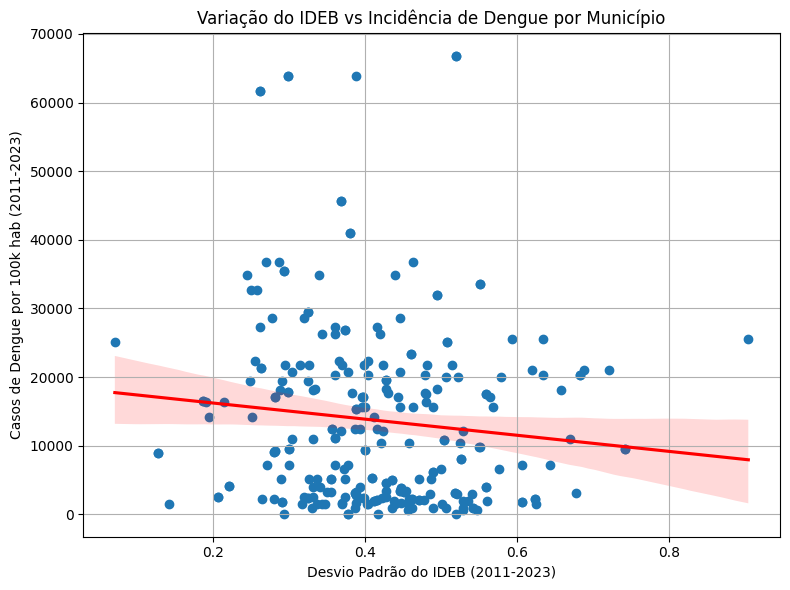

In [ ]:
# Relação entre variação do IDEB e incidência de dengue (gráfico de dispersão)
plt.figure(figsize=(8,6))
# sns.scatterplot(data=df_var_ideb, x='IDEB_std', y='p_inc100k')
sns.regplot(data=df_var_ideb, x='IDEB_std', y='p_inc100k', scatter_kws={'alpha':1}, line_kws={'color':'red'},)
plt.xlabel('Desvio Padrão do IDEB (2011-2023)')
plt.ylabel('Casos de Dengue por 100k hab (2011-2023)')
plt.title('Variação do IDEB vs Incidência de Dengue por Município')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Correlação entre variação do IDEB e incidência de dengue
corr_var = df_var_ideb['IDEB_std'].corr(df_var_ideb['p_inc100k'])
print(f'Correlação entre variação do IDEB e incidência de dengue: {corr_var:.2f}')

Correlação entre variação do IDEB e incidência de dengue: -0.11


In [ ]:
from scipy.stats import ttest_ind

# Definir limiar para alta/baixa incidência (mediana)
limiar = df_var_ideb['p_inc100k'].median()
grupo_alto = df_var_ideb[df_var_ideb['p_inc100k'] > limiar]['IDEB_medio']
grupo_baixo = df_var_ideb[df_var_ideb['p_inc100k'] <= limiar]['IDEB_medio']

# Comparar médias
media_alto = grupo_alto.mean()
media_baixo = grupo_baixo.mean()
print(f"Média IDEB (alta incidência dengue): {media_alto:.2f}")
print(f"Média IDEB (baixa incidência dengue): {media_baixo:.2f}")

# Teste t de médias
t_stat, p_val = ttest_ind(grupo_alto, grupo_baixo, nan_policy='omit')
print(f"Teste t: t={t_stat:.2f}, p-valor={p_val:.4f}")

if p_val < 0.05:
    print("Diferença significativa entre as médias de IDEB dos grupos (p < 0.05).")
else:
    print("Não há diferença significativa entre as médias de IDEB dos grupos (p >= 0.05).")

Média IDEB (alta incidência dengue): 6.24
Média IDEB (baixa incidência dengue): 5.99
Teste t: t=4.35, p-valor=0.0000
Diferença significativa entre as médias de IDEB dos grupos (p < 0.05).


Os resultados mostram uma diferença significativa entre as médias de IDEB na comparação entre os dois grupos. Essa diferença pode ser um indicativo de que os casos de dengue podem ter uma correlação com performance de estudos, mas também pode ser um sinal de que as médias de IDEB possuem baixa variância.

## **Q4. Pergunta 4.** Existe relação entre o desempenho escolar (IDEB) e a incidência de doenças como gripe no estado de São Paulo?

Com base no que foi encontrado no gráfico da questão 1, procuramos saber se há correlação entre desempenho escolar (IDEB) e casos de gripe, ou se a queda das médias de nota foi apenas resultado da pandemia, e não há correlação ao longo dos outros anos.

Será utilizado o número de casos reportados semanais, somados após agrupar por ano e estado.

In [ ]:
df_gripe_agg = df_gripe_idade_tratado.groupby(['Ano epidemiológico', 'Unidade da Federação'])['Casos semanais reportados até a última atualização']
df_gripe_agg = df_gripe_agg.sum().reset_index()
df_gripe_agg

,Ano epidemiológico,Unidade da Federação,Casos semanais reportados até a última atualização
0,2011,São Paulo,1527.304668
1,2013,São Paulo,24963.479464
2,2015,São Paulo,5751.380466
3,2017,São Paulo,14203.106342
4,2019,São Paulo,22983.118580
5,2021,São Paulo,772568.265611
6,2023,São Paulo,71136.876216


### Preparando os dados de desempenho escolar
Os valores para IDEB estão por colunas. Será realizado um melt para transformar o dataframe em formato longo e tornar as colunas em linhas mais fáceis de analisar e manipular.

In [ ]:
# Selecionando IDEB de anos iniciais para o mesmo ano
df_escolaridade_anos_iniciais = df_municipios_anos_iniciais_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_OBSERVADO_2011', 'VL_OBSERVADO_2013', 'VL_OBSERVADO_2015', 'VL_OBSERVADO_2017', 'VL_OBSERVADO_2019', 'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023']]
df_escolaridade_anos_finais = df_municipios_anos_finais_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_OBSERVADO_2011', 'VL_OBSERVADO_2013', 'VL_OBSERVADO_2015', 'VL_OBSERVADO_2017', 'VL_OBSERVADO_2019', 'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023']]
df_escolaridade_ensino_medio = df_municipios_ensino_medio_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_OBSERVADO_2017', 'VL_OBSERVADO_2019', 'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023']]

# Fazendo o melt para transformar em formato longo
df_escolaridade_ai_long = pd.melt(
    df_escolaridade_anos_iniciais,
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'],
    value_vars=["VL_OBSERVADO_2011", "VL_OBSERVADO_2013", "VL_OBSERVADO_2015", "VL_OBSERVADO_2017", "VL_OBSERVADO_2019", "VL_OBSERVADO_2021", "VL_OBSERVADO_2023"],
    var_name='Ano_Escolaridade',
    value_name='IDEB'
)

df_escolaridade_af_long = pd.melt(
    df_escolaridade_anos_finais,
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'],
    value_vars=["VL_OBSERVADO_2011", "VL_OBSERVADO_2013", "VL_OBSERVADO_2015", "VL_OBSERVADO_2017", "VL_OBSERVADO_2019", "VL_OBSERVADO_2021", "VL_OBSERVADO_2023"],
    var_name='Ano_Escolaridade',
    value_name='IDEB'
)

df_escolaridade_em_long = pd.melt(
    df_escolaridade_ensino_medio,
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'],
    value_vars=["VL_OBSERVADO_2017", "VL_OBSERVADO_2019", "VL_OBSERVADO_2021", "VL_OBSERVADO_2023"],
    var_name='Ano_Escolaridade',
    value_name='IDEB'
)

# Definindo a data como apenas o ano
df_escolaridade_ai_long['Ano_Escolaridade'] = df_escolaridade_ai_long['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)
df_escolaridade_af_long['Ano_Escolaridade'] = df_escolaridade_af_long['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)
df_escolaridade_em_long['Ano_Escolaridade'] = df_escolaridade_em_long['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)

# Agrupando todos os dados para contar o valor para o estado de São Paulo por ano
df_escolaridade_ai_agg = df_escolaridade_ai_long.groupby(['Ano_Escolaridade'])['IDEB'].mean().reset_index()
df_escolaridade_af_agg = df_escolaridade_af_long.groupby(['Ano_Escolaridade'])['IDEB'].mean().reset_index()
df_escolaridade_em_agg = df_escolaridade_em_long.groupby(['Ano_Escolaridade'])['IDEB'].mean().reset_index()

# Adicionando a coluna de estado
df_escolaridade_ai_agg["Estado"] = "São Paulo"
df_escolaridade_af_agg["Estado"] = "São Paulo"
df_escolaridade_em_agg["Estado"] = "São Paulo"

Agora será feito um merge entre os valores agregados da grip com os valores agregados de escolaridade.

In [ ]:
df_merge_gripe_escolaridade_ai = pd.merge(
    df_gripe_agg,
    df_escolaridade_ai_agg,
    left_on=['Ano epidemiológico', 'Unidade da Federação'],
    right_on=['Ano_Escolaridade', 'Estado']
)

df_merge_gripe_escolaridade_af = pd.merge(
    df_gripe_agg,
    df_escolaridade_af_agg,
    left_on=['Ano epidemiológico', 'Unidade da Federação'],
    right_on=['Ano_Escolaridade', 'Estado']
)

df_merge_gripe_escolaridade_em = pd.merge(
    df_gripe_agg,
    df_escolaridade_em_agg,
    left_on=['Ano epidemiológico', 'Unidade da Federação'],
    right_on=['Ano_Escolaridade', 'Estado']
)

df_merge_gripe_escolaridade_ai

,Ano epidemiológico,Unidade da Federação,Casos semanais reportados até a última atualização,Ano_Escolaridade,IDEB,Estado
0,2011,São Paulo,1527.304668,2011,5.525000,São Paulo
1,2013,São Paulo,24963.479464,2013,5.787072,São Paulo
2,2015,São Paulo,5751.380466,2015,6.246415,São Paulo
3,2017,São Paulo,14203.106342,2017,6.480682,São Paulo
4,2019,São Paulo,22983.118580,2019,6.546768,São Paulo
5,2021,São Paulo,772568.265611,2021,6.159449,São Paulo
6,2023,São Paulo,71136.876216,2023,6.308429,São Paulo


### Scatterplot da relação entre gripe e IDEB

O scatterplot é utilizado para tentar visualizar alguma correlação entre os dois dados. O scatterplot é feito entre IDEB com o número de casos. Os anos iniciais, finais e ensino médio são separados por cor, e cada ano possui um ícone diferente.

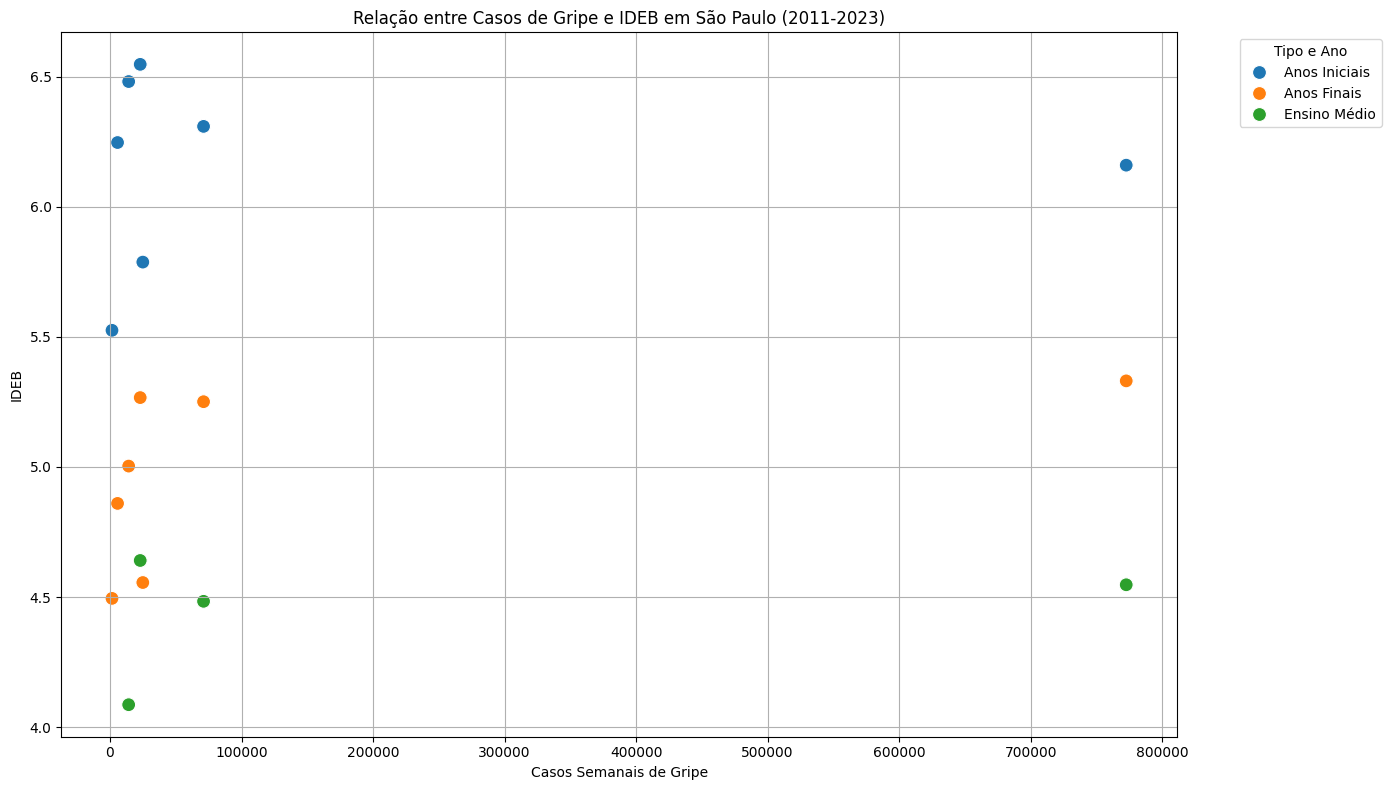

In [ ]:
df_merge_gripe_escolaridade_ai['Tipo'] = 'Anos Iniciais'
df_merge_gripe_escolaridade_af['Tipo'] = 'Anos Finais'
df_merge_gripe_escolaridade_em['Tipo'] = 'Ensino Médio'

df_merge_total = pd.concat([df_merge_gripe_escolaridade_ai, df_merge_gripe_escolaridade_af], ignore_index=True)

df_merge_total = pd.concat([df_merge_total, df_merge_gripe_escolaridade_em], ignore_index=True)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_merge_total,
    x='Casos semanais reportados até a última atualização',
    y='IDEB',
    hue='Tipo',
    s=100
)

plt.title('Relação entre Casos de Gripe e IDEB em São Paulo (2011-2023)')
plt.xlabel('Casos Semanais de Gripe')
plt.ylabel('IDEB')
plt.legend(title='Tipo e Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_merge_total[df_merge_total['Ano_Escolaridade'] != 2021]

,Ano epidemiológico,Unidade da Federação,Casos semanais reportados até a última atualização,Ano_Escolaridade,IDEB,Estado,Tipo
0,2011,São Paulo,1527.304668,2011,5.525000,São Paulo,Anos Iniciais
1,2013,São Paulo,24963.479464,2013,5.787072,São Paulo,Anos Iniciais
2,2015,São Paulo,5751.380466,2015,6.246415,São Paulo,Anos Iniciais
3,2017,São Paulo,14203.106342,2017,6.480682,São Paulo,Anos Iniciais
4,2019,São Paulo,22983.118580,2019,6.546768,São Paulo,Anos Iniciais
6,2023,São Paulo,71136.876216,2023,6.308429,São Paulo,Anos Iniciais
7,2011,São Paulo,1527.304668,2011,4.495131,São Paulo,Anos Finais
8,2013,São Paulo,24963.479464,2013,4.556061,São Paulo,Anos Finais
9,2015,São Paulo,5751.380466,2015,4.860000,São Paulo,Anos Finais
10,2017,São Paulo,14203.106342,2017,5.003409,São Paulo,Anos Finais


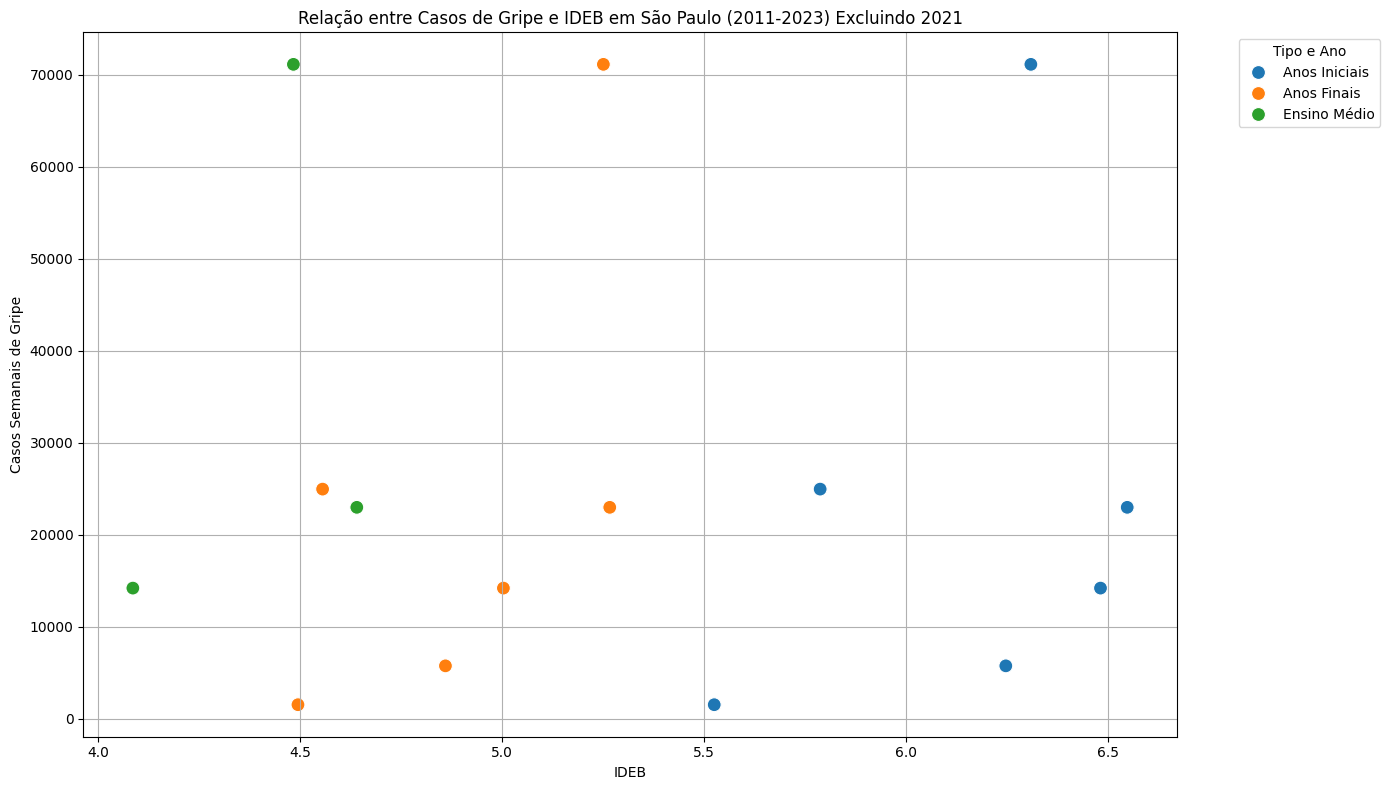

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_merge_total[df_merge_total['Ano_Escolaridade'] != 2021],
    y='Casos semanais reportados até a última atualização',
    x='IDEB',
    hue='Tipo',
    s=100
)

plt.title('Relação entre Casos de Gripe e IDEB em São Paulo (2011-2023) Excluindo 2021')
plt.ylabel('Casos Semanais de Gripe')
plt.xlabel('IDEB')
plt.legend(title='Tipo e Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

---
### Análise do gráfico

Visualmente, não é possível verificar uma correlação. Em 2021, o resultado está fora do padrão. Os dados da Infogripe incluem os casos de covid-19, o que causa esse grande aumento de casos. Agora será feito um cálculo de correlação para definir se ela existe.

In [ ]:
correlacao = df_merge_gripe_escolaridade_ai['IDEB'].corr(df_merge_gripe_escolaridade_ai['Casos semanais reportados até a última atualização'])
print(f"Correlação entre Casos de Gripe e IDEB (Anos Iniciais): {correlacao:.2f}")

Correlação entre Casos de Gripe e IDEB (Anos Iniciais): 0.04


In [ ]:
correlacao = df_merge_gripe_escolaridade_af['IDEB'].corr(df_merge_gripe_escolaridade_af['Casos semanais reportados até a última atualização'])
print(f"Correlação entre IDEB e Casos Semanais de Gripe (Anos Finais): {correlacao:.2f}")

Correlação entre IDEB e Casos Semanais de Gripe (Anos Finais): 0.51


In [ ]:
correlacao = df_merge_gripe_escolaridade_em['IDEB'].corr(df_merge_gripe_escolaridade_em['Casos semanais reportados até a última atualização'])
print(f"Correlação entre IDEB e Casos Semanais de Gripe (Ensino Médio): {correlacao:.2f}")

Correlação entre IDEB e Casos Semanais de Gripe (Ensino Médio): 0.32


Pelos resultados alcançados, não há correlação para os anos iniciais e ensino médio. Para o caso dos anos finais, há uma possibilidade de correlação, que pode ser explicada por conta de 2021.

In [ ]:
correlacao = df_merge_gripe_escolaridade_ai[df_merge_gripe_escolaridade_ai['Ano_Escolaridade'] != 2021]['IDEB'].corr(df_merge_gripe_escolaridade_ai['Casos semanais reportados até a última atualização'])
print(f"Correlação entre IDEB e Casos Semanais de Gripe (Anos Iniciais): {correlacao:.2f}")

Correlação entre IDEB e Casos Semanais de Gripe (Anos Iniciais): 0.31


In [ ]:
correlacao = df_merge_gripe_escolaridade_af[df_merge_gripe_escolaridade_af['Ano_Escolaridade'] != 2021]['IDEB'].corr(df_merge_gripe_escolaridade_af['Casos semanais reportados até a última atualização'])
print(f"Correlação entre IDEB e Casos Semanais de Gripe (Anos Finais): {correlacao:.2f}")

Correlação entre IDEB e Casos Semanais de Gripe (Anos Finais): 0.59


In [ ]:
correlacao = df_merge_gripe_escolaridade_em[df_merge_gripe_escolaridade_em['Ano_Escolaridade'] != 2021]['IDEB'].corr(df_merge_gripe_escolaridade_em['Casos semanais reportados até a última atualização'])
print(f"Correlação entre IDEB e Casos Semanais de Gripe (Ensino Médio): {correlacao:.2f}")

Correlação entre IDEB e Casos Semanais de Gripe (Ensino Médio): 0.38


Removendo o ano de 2021, há um aumento nos valores de correlação, principalmente para os anos iniciais. Ainda assim, não são valores incisivos para definir correlação.

### Conclusão
Há uma possibilidade de correlação que pode ser estudada. A pouca presença de dados, e a ampliação pra uma análise estadual e não municipal pode explicar o fenômeno. Principalmente, cidades com alta população vão apresentar maiores índices de contaminação. Devemos então tentar encontrar uma correlação entre performance escolar com população.

## **Q5. Pergunta 5.** Há mudança significativa nos dados de gripe após 2020?

De acordo com o início da proliferação do covid-19, e como visto nos gráficos anteriores, os casos de gripe aumentaram desproporcionalmente em 2021. Este teste é para ver se matemáticamente essa mudança está presente.

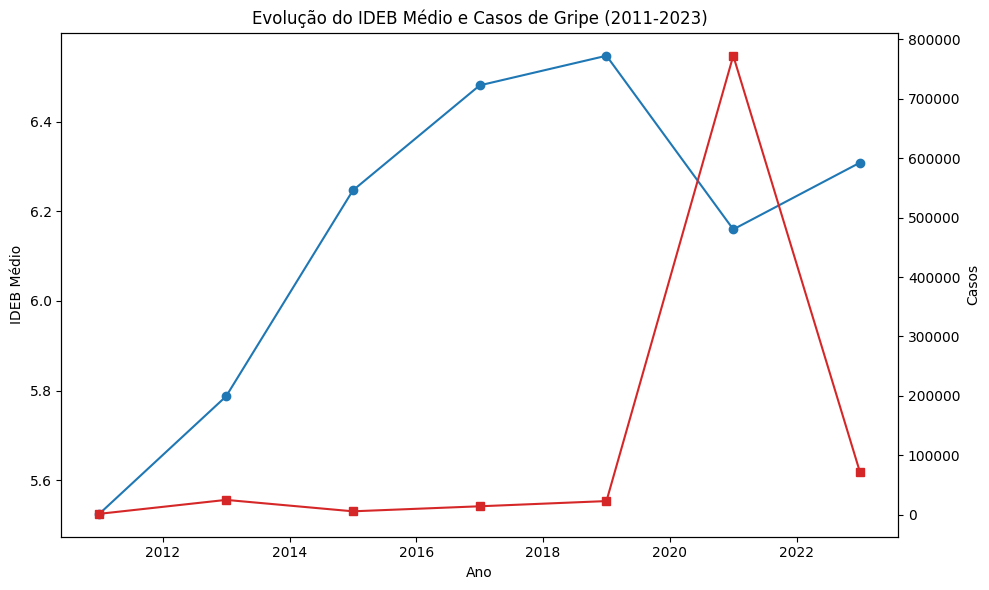

In [ ]:
# Calcular IDEB médio estadual por ano
ideb_cols_ano = [f'VL_OBSERVADO_{y}' for y in ['2011', '2013', '2015', '2017', '2019', '2021', '2023'] if f'VL_OBSERVADO_{y}' in df_municipios_anos_iniciais_tratado.columns]
df_ideb_ano = pd.DataFrame({
    'Ano': [int(col[-4:]) for col in ideb_cols_ano],
    'IDEB_medio': [df_municipios_anos_iniciais_tratado[col].mean() for col in ideb_cols_ano]
})

df_gripe_ano = df_gripe_idade[df_gripe_idade['Unidade da Federação'] == "São Paulo"].groupby('Ano epidemiológico')['Casos semanais reportados até a última atualização'].sum().reset_index()
# cortar dados antes de 2011 e depois de 2023
df_gripe_ano = df_gripe_ano[(df_gripe_ano['Ano epidemiológico'] >= 2011) & (df_gripe_ano['Ano epidemiológico'] <= 2023)]

# Merge para comparar as séries

df_ideb_gripe = pd.merge(df_ideb_ano, df_gripe_ano, left_on='Ano', right_on='Ano epidemiológico', how='inner')

# Plotar as duas séries temporais
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('IDEB Médio')
ax1.plot(df_ideb_gripe['Ano epidemiológico'], df_ideb_gripe['IDEB_medio'], marker='o', color=color, label='IDEB Médio')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Casos')
ax2.plot(df_ideb_gripe['Ano epidemiológico'], df_ideb_gripe['Casos semanais reportados até a última atualização'], marker='s', color=color, label='Casos de Gripe')
ax2.tick_params(axis='y')

plt.title('Evolução do IDEB Médio e Casos de Gripe (2011-2023)')
fig.tight_layout()
plt.show()


### Teste t de médias

A partir do gráfico acima, fica visível que há um salto em casos de gripe. Mas agora vamos verificar a partir de um teste t de médias se há essa mudança.

In [ ]:
from scipy.stats import ttest_ind

# Separar anos antes e depois de 2020
antes_2020 = df_gripe_ano[df_gripe_ano['Ano epidemiológico'] < 2020]['Casos semanais reportados até a última atualização']
apos_2020 = df_gripe_ano[df_gripe_ano['Ano epidemiológico'] >= 2020]['Casos semanais reportados até a última atualização']

# Teste t de médias
t_stat, p_val = ttest_ind(antes_2020, apos_2020, nan_policy='omit')
print(f"Teste t: t={t_stat:.2f}, p-valor={p_val:.4f}")

if p_val < 0.05:
    print("Rejeita-se H0: Houve mudança significativa nos casos de gripe após 2020.")
else:
    print("Não rejeita H0: Não houve mudança significativa nos casos de gripe após 2020.")

Teste t: t=-3.57, p-valor=0.0044
Rejeita-se H0: Houve mudança significativa nos casos de gripe após 2020.


### Conclusão
O resultado apresentado pelo teste t de médias é o esperado. O pico de 2021 resultado da covid-19 é uma mudança significativa numérica além de visual.

## **Q6. Pergunta 6.** Existe relação entre população e desempenho escolar (SAEB, IDEB)?


Os resultados do IDEB levam em conta diversos fatores como taxa de aprovação e nota do SAEB.

Vamos comparar a nota do IDEB com a do SAEB, querendo visualizar alguma possível relação entre os dois que possa ser estudada.

Para realizar essa análise, vamos comparar os 5 estados mais populosos com os 5 menos populoso, considerando que a lista de municípios já engloba as 100 maiores populações do estado.

In [ ]:
df_populacao = pd.DataFrame({
    'Estado': nome_cidades,
    'Pop': [df_cidades_dengue_transposto[cidade]['pop'].max() for cidade in nome_cidades]
})

# Verificando os 5 estados com maior população
df_populacao.nlargest(5, 'Pop')

# Maiores populações: São Paulo, Guarulhos, Campinas, São Bernardo do Campo, Osasco

,Estado,Pop
0,São Paulo,12325232.0
1,Guarulhos,1392121.0
2,Campinas,1213792.0
3,São Bernardo do Campo,844483.0
7,Osasco,777048.0


In [ ]:
df_populacao.nsmallest(10, 'Pop')

# Os valores encontrados de Santo André, Praia Grande e Rio Claro não são corretos e serão ignorados

# Menores populações: Bariri, Cravinhos, Ituverava, Dracena

,Estado,Pop
5,Santo André,2622.0
21,Praia Grande,8131.0
39,Rio Claro,18605.0
96,Bariri,35558.0
76,Cravinhos,35579.0
69,Ituverava,42045.0
94,Dracena,47043.0
92,Capão Bonito,47118.0
89,Vargem Grande Paulista,53777.0
59,Taquaritinga,57364.0


In [ ]:
cidades_escolhidas = ['São Paulo', 'Guarulhos', 'Campinas', 'São Bernardo do Campo', 'Osasco',
                      'Bariri', 'Cravinhos', 'Ituverava', 'Dracena', 'Capão Bonito']
maiores = cidades_escolhidas[:5]
menores = cidades_escolhidas[5:]

### Manipulando os datasets
Após definir as maiores e menores cidades por população, realizaremos manipulações no dataset para criar um que contenha as informações de notas do IDEB e de população.

In [ ]:
# Unificando os dataframes pelo nome da cidade e ano para todos os anos disponíveis (2011-2023)
df_ai = df_escolaridade_ai_long.rename(columns={'IDEB': 'IDEB_AI'})
df_af = df_escolaridade_af_long.rename(columns={'IDEB': 'IDEB_AF'})
df_em = df_escolaridade_em_long.rename(columns={'IDEB': 'IDEB_EM'})

# Merge completo para todos os anos e cidades

df_ideb_all = pd.merge(
    df_ai[['NO_MUNICIPIO', 'Ano_Escolaridade', 'IDEB_AI']],
    df_af[['NO_MUNICIPIO', 'Ano_Escolaridade', 'IDEB_AF']],
    how='outer',
    on=['NO_MUNICIPIO', 'Ano_Escolaridade']
)

df_ideb_all = pd.merge(
    df_ideb_all,
    df_em[['NO_MUNICIPIO', 'Ano_Escolaridade', 'IDEB_EM']],
    how='outer',
    on=['NO_MUNICIPIO', 'Ano_Escolaridade']
)

# Adicionando coluna de população
df_ideb_all['Pop'] = df_ideb_all['NO_MUNICIPIO'].map(
    lambda cidade: df_cidades_dengue_transposto[cidade]['pop'].max() if cidade in df_cidades_dengue_transposto else np.nan
)

# Renomeando para colunas
df_ideb_all = df_ideb_all.rename(columns={'NO_MUNICIPIO': 'Estado', 'Ano_Escolaridade': 'Ano'})

# Mantendo todas as combinações de cidade e ano (2011-2023)
df_ideb_all = df_ideb_all[['Ano', 'Estado', 'Pop', 'IDEB_AI', 'IDEB_AF', 'IDEB_EM']].sort_values(['Estado', 'Ano'])
df_ideb_all = df_ideb_all.drop_duplicates(subset=['Estado', 'Ano'])

df_ideb_all.head(10)

,Ano,Estado,Pop,IDEB_AI,IDEB_AF,IDEB_EM
0,2011,Americana,243674.0,5.9,4.8,NaN
9,2013,Americana,243674.0,6.1,5.0,NaN
18,2015,Americana,243674.0,6.8,5.1,NaN
27,2017,Americana,243674.0,6.9,5.1,4.5
45,2019,Americana,243674.0,6.9,5.5,4.9
63,2021,Americana,243674.0,6.7,5.4,4.7
81,2023,Americana,243674.0,6.7,5.4,4.5
99,2011,Araraquara,250304.0,5.9,4.6,NaN
108,2013,Araraquara,250304.0,6.3,4.6,NaN
117,2015,Araraquara,250304.0,7.1,4.9,NaN


Filtrar o novo dataframe, utilizando apenas os municípios desejados.

In [ ]:
# Filtrando apenas as cidades escolhidas
df_ideb_all = df_ideb_all[df_ideb_all['Estado'].isin(cidades_escolhidas)]

Aplicando o mesmo processo de tratamento de dados do IDEB para as notas do SAEB.

In [ ]:
df_escolaridade_anos_iniciais_saeb = df_municipios_anos_iniciais_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_NOTA_MEDIA_2011', 'VL_NOTA_MEDIA_2013', 'VL_NOTA_MEDIA_2015', 'VL_NOTA_MEDIA_2017', 'VL_NOTA_MEDIA_2019', 'VL_NOTA_MEDIA_2021', 'VL_NOTA_MEDIA_2023']]
df_escolaridade_anos_finais_saeb = df_municipios_anos_finais_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_NOTA_MEDIA_2011', 'VL_NOTA_MEDIA_2013', 'VL_NOTA_MEDIA_2015', 'VL_NOTA_MEDIA_2017', 'VL_NOTA_MEDIA_2019', 'VL_NOTA_MEDIA_2021', 'VL_NOTA_MEDIA_2023']]
df_escolaridade_ensino_medio_saeb = df_municipios_ensino_medio_tratado[['NO_MUNICIPIO', 'CO_MUNICIPIO', 'VL_NOTA_MEDIA_2017', 'VL_NOTA_MEDIA_2019', 'VL_NOTA_MEDIA_2021', 'VL_NOTA_MEDIA_2023']]

# Fazendo o melt para transformar em formato longo

df_escolaridade_ai_long_saeb = pd.melt(
    df_escolaridade_anos_iniciais_saeb,
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'],
    value_vars=["VL_NOTA_MEDIA_2011", "VL_NOTA_MEDIA_2013", "VL_NOTA_MEDIA_2015", "VL_NOTA_MEDIA_2017", "VL_NOTA_MEDIA_2019", "VL_NOTA_MEDIA_2021", "VL_NOTA_MEDIA_2023"],
    var_name='Ano_Escolaridade',
    value_name='Nota_Media'
)

df_escolaridade_af_long_saeb = pd.melt(
    df_escolaridade_anos_finais_saeb,
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'],
    value_vars=["VL_NOTA_MEDIA_2011", "VL_NOTA_MEDIA_2013", "VL_NOTA_MEDIA_2015", "VL_NOTA_MEDIA_2017", "VL_NOTA_MEDIA_2019", "VL_NOTA_MEDIA_2021", "VL_NOTA_MEDIA_2023"],
    var_name='Ano_Escolaridade',
    value_name='Nota_Media'
)

df_escolaridade_em_long_saeb = pd.melt(
    df_escolaridade_ensino_medio_saeb,
    id_vars=['NO_MUNICIPIO', 'CO_MUNICIPIO'],
    value_vars=["VL_NOTA_MEDIA_2017", "VL_NOTA_MEDIA_2019", "VL_NOTA_MEDIA_2021", "VL_NOTA_MEDIA_2023"],
    var_name='Ano_Escolaridade',
    value_name='Nota_Media'
)

df_escolaridade_ai_long_saeb['Ano_Escolaridade'] = df_escolaridade_ai_long_saeb['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)
df_escolaridade_af_long_saeb['Ano_Escolaridade'] = df_escolaridade_af_long_saeb['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)
df_escolaridade_em_long_saeb['Ano_Escolaridade'] = df_escolaridade_em_long_saeb['Ano_Escolaridade'].str.extract(r'_(\d{4})')[0].astype(int)

# Agrupando todos os dados para contar o valor para o estado de São Paulo por ano
df_escolaridade_ai_agg_saeb = df_escolaridade_ai_long_saeb.groupby(['Ano_Escolaridade'])['Nota_Media'].mean().reset_index()
df_escolaridade_af_agg_saeb = df_escolaridade_af_long_saeb.groupby(['Ano_Escolaridade'])['Nota_Media'].mean().reset_index()
df_escolaridade_em_agg_saeb = df_escolaridade_em_long_saeb.groupby(['Ano_Escolaridade'])['Nota_Media'].mean().reset_index()

df_escolaridade_ai_agg_saeb['Estado'] = "São Paulo"
df_escolaridade_af_agg_saeb['Estado'] = "São Paulo"
df_escolaridade_em_agg_saeb['Estado'] = "São Paulo"

In [ ]:
# Criar grafico entre população e nota média
df_saeb_ai = df_escolaridade_ai_long_saeb.rename(columns={'Nota_Media': 'Nota_Media_AI'})
df_saeb_af = df_escolaridade_af_long_saeb.rename(columns={'Nota_Media': 'Nota_Media_AF'})
df_saeb_em = df_escolaridade_em_long_saeb.rename(columns={'Nota_Media': 'Nota_Media_EM'})

# Merge completo para todos os anos e cidades
df_saeb_all = pd.merge(
    df_saeb_ai[['NO_MUNICIPIO', 'Ano_Escolaridade', 'Nota_Media_AI']],
    df_saeb_af[['NO_MUNICIPIO', 'Ano_Escolaridade', 'Nota_Media_AF']],
    how='outer',
    on=['NO_MUNICIPIO', 'Ano_Escolaridade']
)

df_saeb_all = pd.merge(
    df_saeb_all,
    df_saeb_em[['NO_MUNICIPIO', 'Ano_Escolaridade', 'Nota_Media_EM']],
    how='outer',
    on=['NO_MUNICIPIO', 'Ano_Escolaridade']
)

# Adicionando Pop
df_saeb_all['Pop'] = df_saeb_all['NO_MUNICIPIO'].map(
    lambda cidade: df_cidades_dengue_transposto[cidade]['pop'].max() if cidade in df_cidades_dengue_transposto else np.nan)

# Renomeando para Estado
df_saeb_all = df_saeb_all.rename(columns={'NO_MUNICIPIO': 'Estado', 'Ano_Escolaridade': 'Ano'})
# Mantendo todas as combinações de cidade e ano (2011-2023)
df_saeb_all = df_saeb_all[['Ano', 'Estado', 'Pop', 'Nota_Media_AI', 'Nota_Media_AF', 'Nota_Media_EM']].sort_values(['Estado', 'Ano'])
df_saeb_all = df_saeb_all.drop_duplicates(subset=['Estado', 'Ano'])
df_saeb_all.head(10)

,Ano,Estado,Pop,Nota_Media_AI,Nota_Media_AF,Nota_Media_EM
0,2011,Americana,243674.0,5.95,5.14,NaN
9,2013,Americana,243674.0,6.17,5.22,NaN
18,2015,Americana,243674.0,6.83,5.47,NaN
27,2017,Americana,243674.0,7.00,5.46,5.02
45,2019,Americana,243674.0,7.01,5.65,5.28
63,2021,Americana,243674.0,6.72,5.53,5.09
81,2023,Americana,243674.0,6.73,5.62,4.97
99,2011,Araraquara,250304.0,5.92,5.02,NaN
108,2013,Araraquara,250304.0,6.28,4.90,NaN
117,2015,Araraquara,250304.0,7.06,5.13,NaN


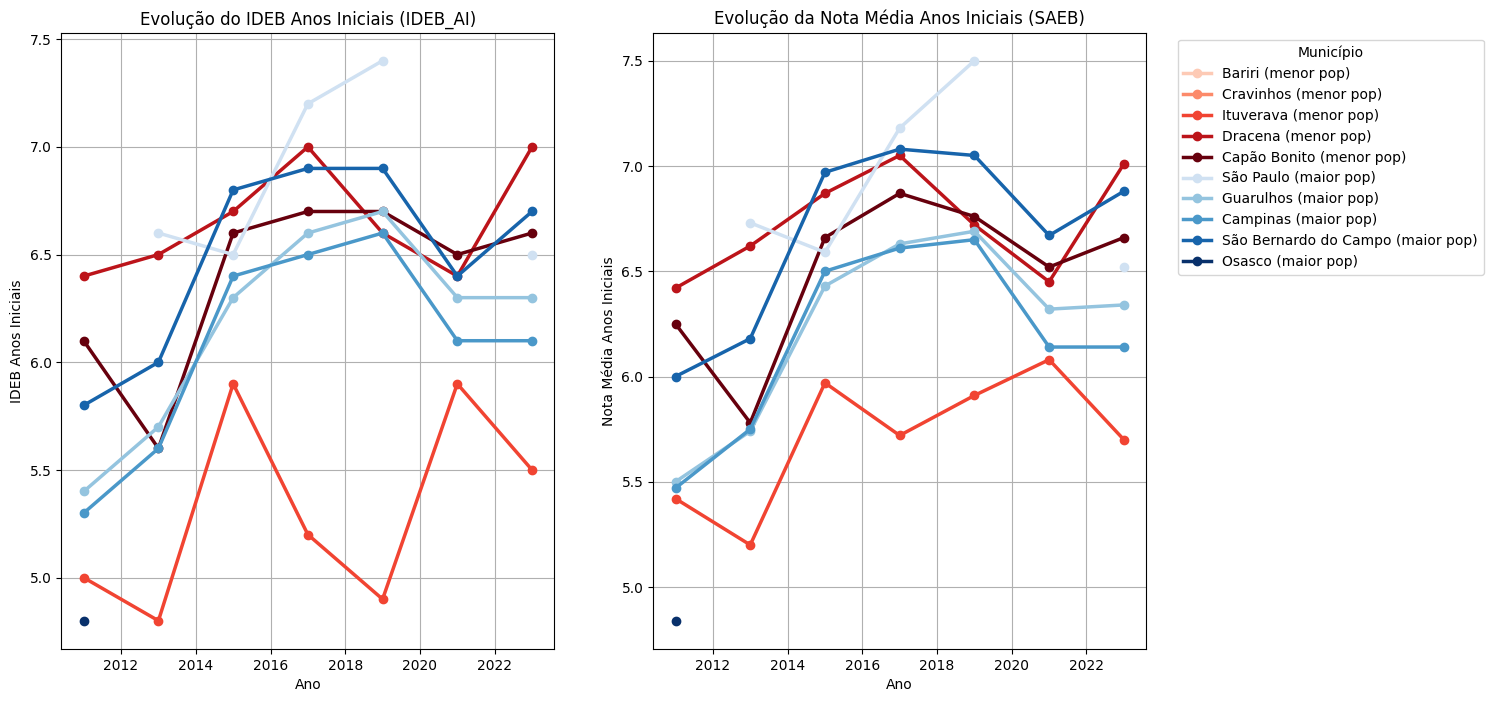

In [ ]:
# Paletas de cores para cada grupo
from matplotlib import cm
cores_menores = cm.Reds(np.linspace(0.2, 1, len(menores)))
cores_maiores = cm.Blues(np.linspace(0.2, 1, len(maiores)))

fig1, ax1 = plt.subplots(1, 2, figsize=(14, 8))

# Menores populações
for i, municipio in enumerate(menores):
    dados_mun = df_ideb_all[df_ideb_all['Estado'] == municipio]
    ax1[0].plot(dados_mun['Ano'], dados_mun['IDEB_AI'], marker='o',
             label=f"{municipio} (menor pop)", color=cores_menores[i], linewidth=2.5)

# Maiores populações
for i, municipio in enumerate(maiores):
    dados_mun = df_ideb_all[df_ideb_all['Estado'] == municipio]
    ax1[0].plot(dados_mun['Ano'], dados_mun['IDEB_AI'], marker='o',
             label=f"{municipio} (maior pop)", color=cores_maiores[i], linewidth=2.5)

ax1[0].set_title('Evolução do IDEB Anos Iniciais (IDEB_AI)')
ax1[0].set_xlabel('Ano')
ax1[0].set_ylabel('IDEB Anos Iniciais')
ax1[0].grid(True)

# Plotando as notas médias do SAEB para os anos iniciais

# Menores populações
for i, municipio in enumerate(menores):
    dados_mun = df_saeb_all[df_saeb_all['Estado'] == municipio]
    ax1[1].plot(dados_mun['Ano'], dados_mun['Nota_Media_AI'], marker='o',
             label=f"{municipio} (menor pop)", color=cores_menores[i], linewidth=2.5)

# Maiores populações
for i, municipio in enumerate(maiores):
    dados_mun = df_saeb_all[df_saeb_all['Estado'] == municipio]
    ax1[1].plot(dados_mun['Ano'], dados_mun['Nota_Media_AI'], marker='o',
             label=f"{municipio} (maior pop)", color=cores_maiores[i], linewidth=2.5)

ax1[1].set_title('Evolução da Nota Média Anos Iniciais (SAEB)')
ax1[1].set_xlabel('Ano')
ax1[1].set_ylabel('Nota Média Anos Iniciais')
ax1[1].legend(title='Município', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1[1].grid(True)

plt.show()


fig.tight_layout()

plt.show()


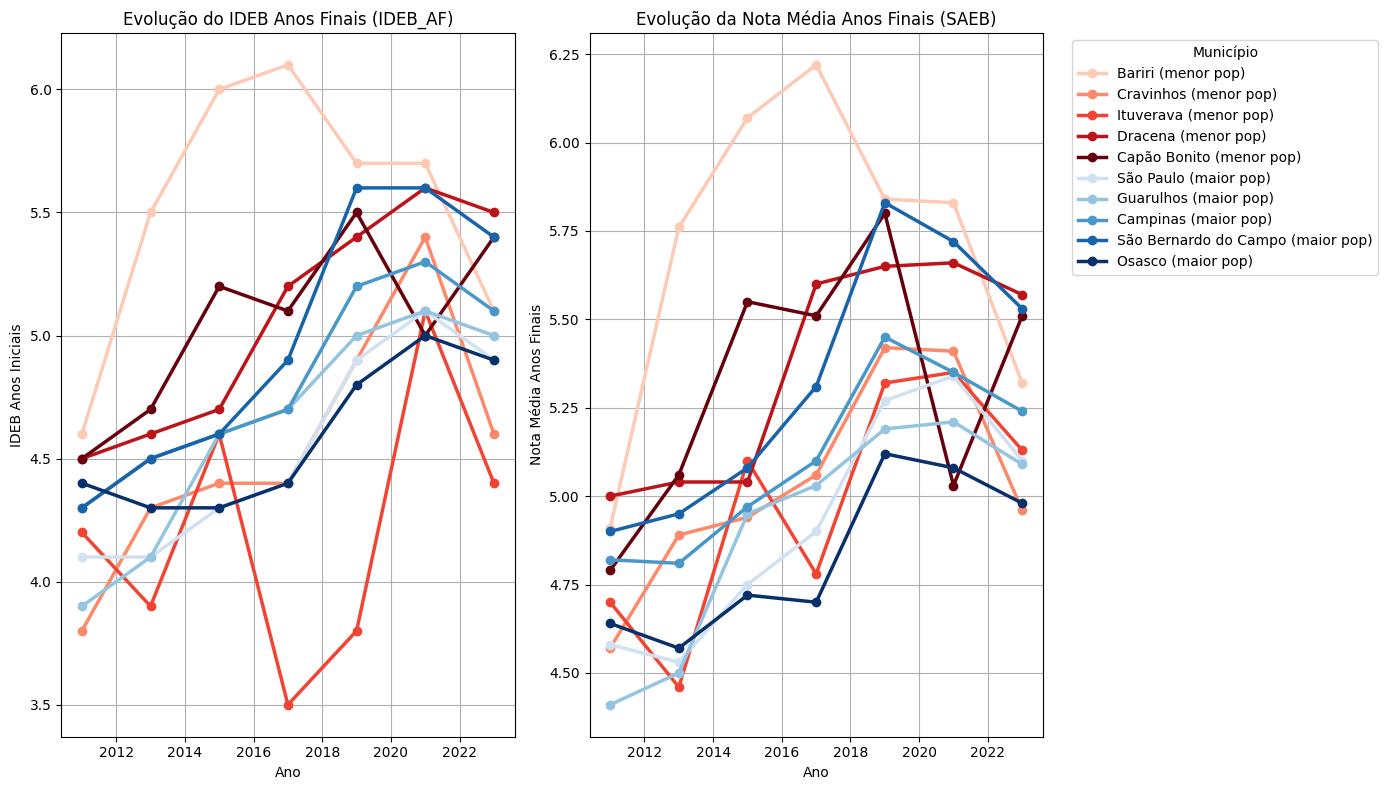

In [ ]:
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 8))

# Menores populações
for i, municipio in enumerate(menores):
    dados_mun = df_ideb_all[df_ideb_all['Estado'] == municipio]
    ax2[0].plot(dados_mun['Ano'], dados_mun['IDEB_AF'], marker='o',
             label=f"{municipio} (menor pop)", color=cores_menores[i], linewidth=2.5)

# Maiores populações
for i, municipio in enumerate(maiores):
    dados_mun = df_ideb_all[df_ideb_all['Estado'] == municipio]
    ax2[0].plot(dados_mun['Ano'], dados_mun['IDEB_AF'], marker='o',
             label=f"{municipio} (maior pop)", color=cores_maiores[i], linewidth=2.5)

ax2[0].set_title('Evolução do IDEB Anos Finais (IDEB_AF)')
ax2[0].set_xlabel('Ano')
ax2[0].set_ylabel('IDEB Anos Iniciais')
ax2[0].grid(True)

# Plotando as notas médias do SAEB para os anos finais

# Menores populações
for i, municipio in enumerate(menores):
    dados_mun = df_saeb_all[df_saeb_all['Estado'] == municipio]
    ax2[1].plot(dados_mun['Ano'], dados_mun['Nota_Media_AF'], marker='o',
             label=f"{municipio} (menor pop)", color=cores_menores[i], linewidth=2.5)

# Maiores populações
for i, municipio in enumerate(maiores):
    dados_mun = df_saeb_all[df_saeb_all['Estado'] == municipio]
    ax2[1].plot(dados_mun['Ano'], dados_mun['Nota_Media_AF'], marker='o',
             label=f"{municipio} (maior pop)", color=cores_maiores[i], linewidth=2.5)

ax2[1].set_title('Evolução da Nota Média Anos Finais (SAEB)')
ax2[1].set_xlabel('Ano')
ax2[1].set_ylabel('Nota Média Anos Finais')
ax2[1].legend(title='Município', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2[1].grid(True)

fig2.tight_layout()

plt.show()


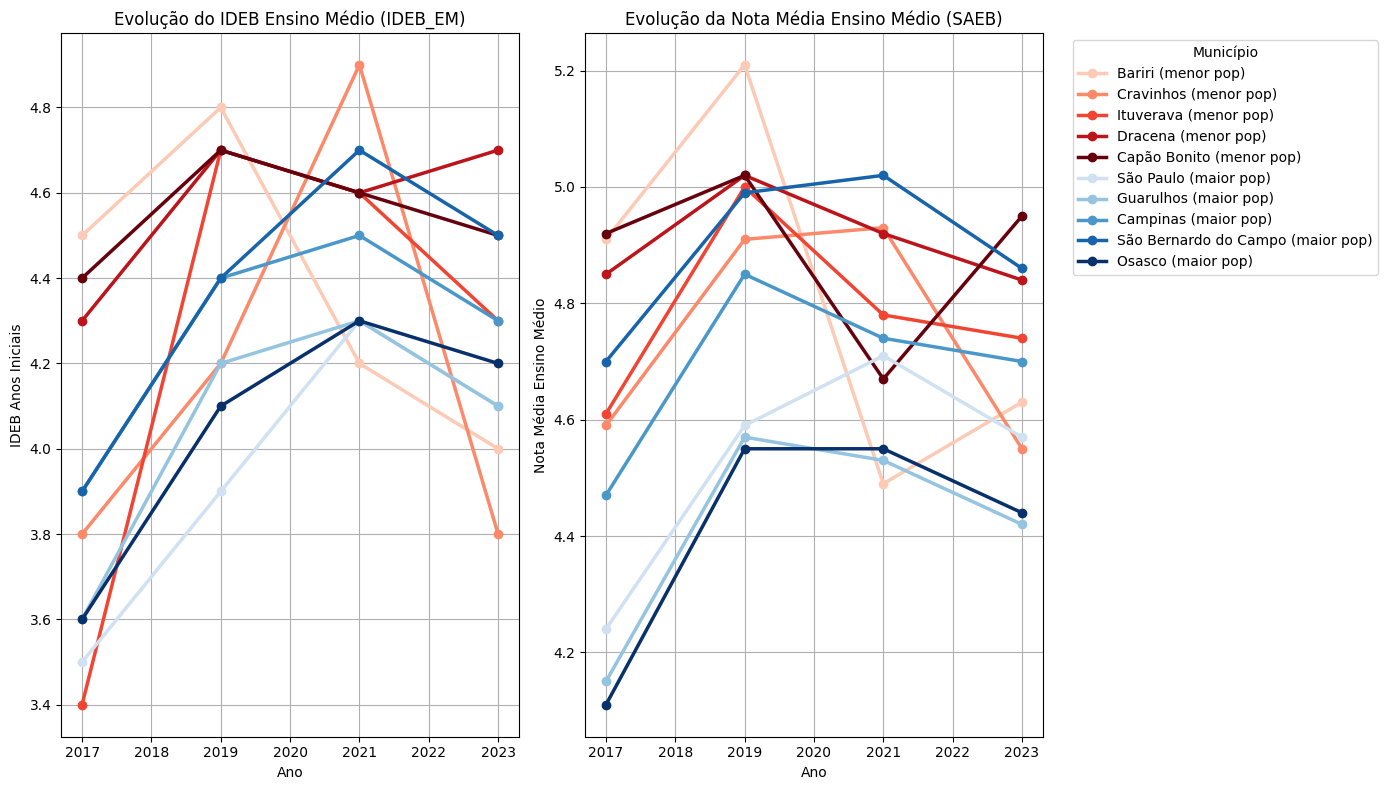

In [ ]:
fig3, ax3 = plt.subplots(1, 2, figsize=(14, 8))

# Menores populações
for i, municipio in enumerate(menores):
    dados_mun = df_ideb_all[df_ideb_all['Estado'] == municipio]
    ax3[0].plot(dados_mun['Ano'], dados_mun['IDEB_EM'], marker='o',
             label=f"{municipio} (menor pop)", color=cores_menores[i], linewidth=2.5)

# Maiores populações
for i, municipio in enumerate(maiores):
    dados_mun = df_ideb_all[df_ideb_all['Estado'] == municipio]
    ax3[0].plot(dados_mun['Ano'], dados_mun['IDEB_EM'], marker='o',
             label=f"{municipio} (maior pop)", color=cores_maiores[i], linewidth=2.5)

ax3[0].set_title('Evolução do IDEB Ensino Médio (IDEB_EM)')
ax3[0].set_xlabel('Ano')
ax3[0].set_ylabel('IDEB Anos Iniciais')
ax3[0].grid(True)

# Plotando as notas médias do SAEB para o ensino médio

# Menores populações
for i, municipio in enumerate(menores):
    dados_mun = df_saeb_all[df_saeb_all['Estado'] == municipio]
    ax3[1].plot(dados_mun['Ano'], dados_mun['Nota_Media_EM'], marker='o',
             label=f"{municipio} (menor pop)", color=cores_menores[i], linewidth=2.5)

# Maiores populações
for i, municipio in enumerate(maiores):
    dados_mun = df_saeb_all[df_saeb_all['Estado'] == municipio]
    ax3[1].plot(dados_mun['Ano'], dados_mun['Nota_Media_EM'], marker='o',
             label=f"{municipio} (maior pop)", color=cores_maiores[i], linewidth=2.5)

ax3[1].set_title('Evolução da Nota Média Ensino Médio (SAEB)')
ax3[1].set_xlabel('Ano')
ax3[1].set_ylabel('Nota Média Ensino Médio')
ax3[1].legend(title='Município', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3[1].grid(True)

fig3.tight_layout()

plt.show()


### **Conclusão**

A relação entre população e desempenho escolar não apresentaram nenhum resultado satisfatório que mostrem alguma correlação. Há alguns pontos de interesse, como a queda em 2019 do IDEB de Ituverava mesmo com o aumento das notas médias. Após uma pesquisa, foi possível descobrir que houve uma mudança no sistema de aprovação que pode explicar o fenomeno.

G1 Ribeirão Preto e Franca. Ideb 2019: Ituverava tem pior avaliação do ensino fundamental no estado de São Paulo. G1, Ribeirão Preto, 21 de abril de 2020. Disponível em: [https://g1.globo.com/sp/ribeirao-preto-franca/noticia/2020/09/21/ideb-2019-ituverava-tem-pior-avaliacao-do-ensino-fundamental-no-estado-de-sao-paulo.ghtml]. Acesso em: 03 jun. 2025.

Outro ponto de interesse é Bariri. Para este município, não encontramos notícias relevantes que expliquem o ocorrido. Uma possível hipótese é a de uma má adaptação ao ensino online necessário no período de 2021.


# **Referências**

https://g1.globo.com/sp/ribeirao-preto-franca/noticia/2020/09/21/ideb-2019-ituverava-tem-pior-avaliacao-do-ensino-fundamental-no-estado-de-sao-paulo.ghtml

https://www.ioc.fiocruz.br/dengue/textos/oportunista.html#:~:text=Por%20ser%20um%20mosquito%20que,de%20mais%20criadouros%20para%20desovar

https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb

https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb

https://todospelaeducacao.org.br/noticias/ideb-e-saeb-2023-conheca-os-avancos-e-retrocessos-dos-estados-e-municipios-brasileiros/

https://g1.globo.com/educacao/noticia/2022/09/16/ideb-2021-pode-passar-impressoes-enganosas-sobre-a-realidade-da-educacao-brasileira-entenda.ghtml

https://info.dengue.mat.br

https://info.gripe.fiocruz.br/

https://pysus.readthedocs.io

# **Conclusão**

Não foi possível encontrar uma boa correlação entre doenças e indicadores de educação. O índice IDEB é realizado de forma bianual. Os dados da gripe estão por estado e o período da análise engloba 7 anos. Foram utilizados apenas os dados da dengue e gripe. O trabalho foi realizado com 100 municípios. Além disso, o ano de 2021 acaba atrapalhando a nossa análise. O próprio INEP passou a não usar o ano de 2021 como comparação.

Todos esses fatores abrem uma oportunidade de um estudo mais aprofundado. Foram analisadas duas doenças com maior presença e dissipação em centros urbanos, apenas no estado de São Paulo. Acreditamos que, se existir correlação entre saúde e educação, pode ser justificado por questões de desenvolvimento do município, e não de uma correlaçao direta entre os dois fatores.

Uma nova análise utilizando índices como IDH, e abrangendo um maior número de municípios talvez possa alcançar insights diferentes do que apresentamos. Outra alternativa é fazer uso do infogripe ser agrupado em estado e realizar uma nova comparação entre estados ou entre regiões.

Luiza Tenent. Ideb 2021 pode passar impressões enganosas sobre a realidade da educação brasileira; ENTENDA. G1, 16 de setembro de 2022. Disponível em: [https://g1.globo.com/educacao/noticia/2022/09/16/ideb-2021-pode-passar-impressoes-enganosas-sobre-a-realidade-da-educacao-brasileira-entenda.ghtml]. Acesso em: 03 jun. 2025.


# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

[Link do github](https://github.com/cesarfkb/trabalho-CD-semestral)

[Link do vídeo](https://www.youtube.com/watch?v=yuul3lwtvXI)

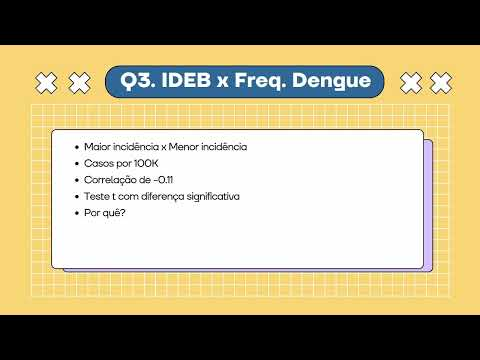

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('yuul3lwtvXI') # substitua pelo seu vídeo

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,César Fukushima Kim,21004780,7.9
1,Enzo Leonardo Sabatelli de Moura,21015350,7.9
